In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#import lightgbm as lgb
import xgboost as xgb


In [2]:
## Mockrobiota Data ##
mock5 = pd.read_csv("merged_mock5_.csv")
mock12 = pd.read_csv("merged_mock12_.csv")
mock13 = pd.read_csv("merged_mock13_.csv")
mock15= pd.read_csv("merged_mock15_.csv")
mock18 = pd.read_csv("merged_mock18_.csv")
mock19 = pd.read_csv("merged_mock19_.csv")
mock20 = pd.read_csv("merged_mock20_.csv")
mock21 = pd.read_csv("merged_mock21_.csv")
mock22 = pd.read_csv("merged_mock22_.csv")
mock23 = pd.read_csv("merged_mock23_.csv")
mock14 = pd.read_csv("mock14_merged.csv")
#mock16 = pd.read_csv("mock16_merged.csv")

In [3]:
## Mock_Peter_data ##
data_1 = pd.read_csv("data_1.csv")
data_2 = pd.read_csv("data_2.csv")
data_3 = pd.read_csv("data_3.csv")

In [39]:
# # Read the image
# from google.colab import drive
# drive.mount('/content/drive')

In [40]:
# ## Mockrobiota Data ##
# mock5 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock5_.csv")
# mock12 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock12_.csv")
# mock13 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock13_.csv")
# mock15= pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock15_.csv")
# mock18 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock18_.csv")
# mock19 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock19_.csv")
# mock20 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock20_.csv")
# mock21 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock21_.csv")
# mock22 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock22_.csv")
# mock23 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/merged_mock23_.csv")
# mock14 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/mock14_merged.csv")
# mock16 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/mock16_merged.csv")

In [41]:
# ## Mock_Peter_data ##
# data_1 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/data_1.csv")
# data_2 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/data_2.csv")
# data_3 = pd.read_csv("/content/drive/MyDrive/Grad-Proj/data_3.csv")

In [4]:
print(data_1.shape)
print(data_2.shape)
print(data_3.shape)

(3178, 69)
(3271, 69)
(3045, 69)


In [6]:
mock5

,Score,Query,numParents,ParentA,ParentB,IdQM,IdQA,IdQB,IdAB,IdQT,...,vs12,vs13,vs14,vs15,vs16,vs17,vs18,YN_,ischimera,uchime3
0,0.0000,Sequence_0/ab=3520010/,1,*,*,*,*,*,*,*,...,0,0,0,0,0,*,N,Non_Chimeric,0,0
1,0.0000,Sequence_1/ab=476521/,1,*,*,*,*,*,*,*,...,0,0,0,0,0,*,N,Non_Chimeric,0,0
2,0.0000,Sequence_10/ab=61239/,1,*,*,*,*,*,*,*,...,6,11,1,0,0,0.4,N,Non_Chimeric,0,0
3,0.3587,Sequence_100/ab=794/,2,Sequence_0/ab=3520010/,Sequence_10/ab=61239/,100,98.8,94,92.8,98.8,...,0,0,3,0,0,1.2,N,Chimeric,1,1
4,0.0080,Sequence_1000/ab=16/,1,Sequence_50/ab=2019/,Sequence_352/ab=240/,100,99.6,99.6,99.2,99.6,...,0,0,1,0,0,0.4,N,Non_Chimeric,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,3.5077,Sequence_995/ab=16/,2,Sequence_9/ab=64014/,Sequence_3/ab=186441/,100,96,82.3,78.3,96,...,0,0,10,0,0,4,Y,Chimeric,1,1
2246,4.1853,Sequence_996/ab=16/,2,Sequence_3/ab=186441/,Sequence_459/ab=177/,100,90,91.6,81.5,91.7,...,0,0,25,0,0,9.9,Y,Chimeric,1,1
2247,0.0080,Sequence_997/ab=16/,1,Sequence_21/ab=6952/,Sequence_263/ab=327/,100,99.6,99.6,99.2,99.6,...,0,0,1,0,0,0.4,N,Non_Chimeric,1,1
2248,0.0000,Sequence_998/ab=16/,2,*,*,*,*,*,*,*,...,0,0,0,0,0,*,N,Non_Chimeric,1,1


In [5]:
import pandas as pd
import numpy as np

def preprocess_dataframe(df):
    df.replace('*', np.nan, inplace=True)

    df['abundance'] = df['Query'].str.extract(r'\b(?:ab=)(\d+)')

    columns_to_remove = ['Name', 'vs2', 'vs3', 'vs4', 'vs5', 'LeftParent', 'RightParent', 'NameOfLeftParent', 'NameOfRightParent', 'ParentA', 'ParentB', 'BestMatchName', 'Query', 'SequenceName', 'LeftWindow', 'RightWindow']
    df.drop(columns=columns_to_remove, inplace=True)

    columns_to_convert = ['IdQM', 'IdQA', 'IdQB', 'IdAB', 'IdQT', 'Div', 'vs6', 'vs7', 'vs8', 'vs9', 'vs10', 'vs17']
    for col in columns_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    columns_to_convert_to_int = ['LY', 'LN', 'LA', 'RY', 'RN', 'RA', 'abundance', 'vs11', 'vs12', 'vs13', 'vs14', 'vs15', 'vs16']
    for col in columns_to_convert_to_int:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

    most_frequent_value = df['vs18'].value_counts().idxmax()
    df['vs18'].replace('?', most_frequent_value, inplace=True)

    df['Flag'].fillna('no', inplace=True)

    df['YN'] = df['YN'].fillna('N')

    df['numParents'] = df['numParents'] - 1

    df['TypeOfSequence'] = df['TypeOfSequence'].apply(lambda x: 0 if x == 'good' else 1)
    df['YN'] = df['YN'].apply(lambda x: 0 if x == 'N' else 1)
    df['Flag'] = df['Flag'].apply(lambda x: 0 if x == 'no' else 1)
    df['vs18'] = df['vs18'].apply(lambda x: 0 if x == 'N' else 1)
    #df['YN_'] = df['YN_'].apply(lambda x: 0 if x == 'Non_Chimeric' else 1)

    df=df.fillna(0)

    return df

mock5 = preprocess_dataframe(mock5)
mock12 = preprocess_dataframe(mock12)
mock13 = preprocess_dataframe(mock13)
mock15 = preprocess_dataframe(mock15)
mock18 = preprocess_dataframe(mock18)
mock19 = preprocess_dataframe(mock19)
mock20 = preprocess_dataframe(mock20)
mock21 = preprocess_dataframe(mock21)
mock22 = preprocess_dataframe(mock22)
mock23 = preprocess_dataframe(mock23)
mock14 = preprocess_dataframe(mock14)
# mock16 = preprocess_dataframe(mock16)
data_1 = preprocess_dataframe(data_1)
data_2 = preprocess_dataframe(data_2)
data_3 = preprocess_dataframe(data_3)

In [6]:
def catch(df):
    df['YN_'] = df['YN_'].apply(lambda x: 0 if x == 'Non_Chimeric' else 1)
    return df

mock5 = catch(mock5)
mock12 = catch(mock12)
mock13 = catch(mock13)
mock15 = catch(mock15)
mock18 = catch(mock18)
mock19 = catch(mock19)
mock20 = catch(mock20)
mock21 = catch(mock21)
mock22 = catch(mock22)
mock23 = catch(mock23)
data_1 = catch(data_1)
data_2 = catch(data_2)
data_3 = catch(data_3)

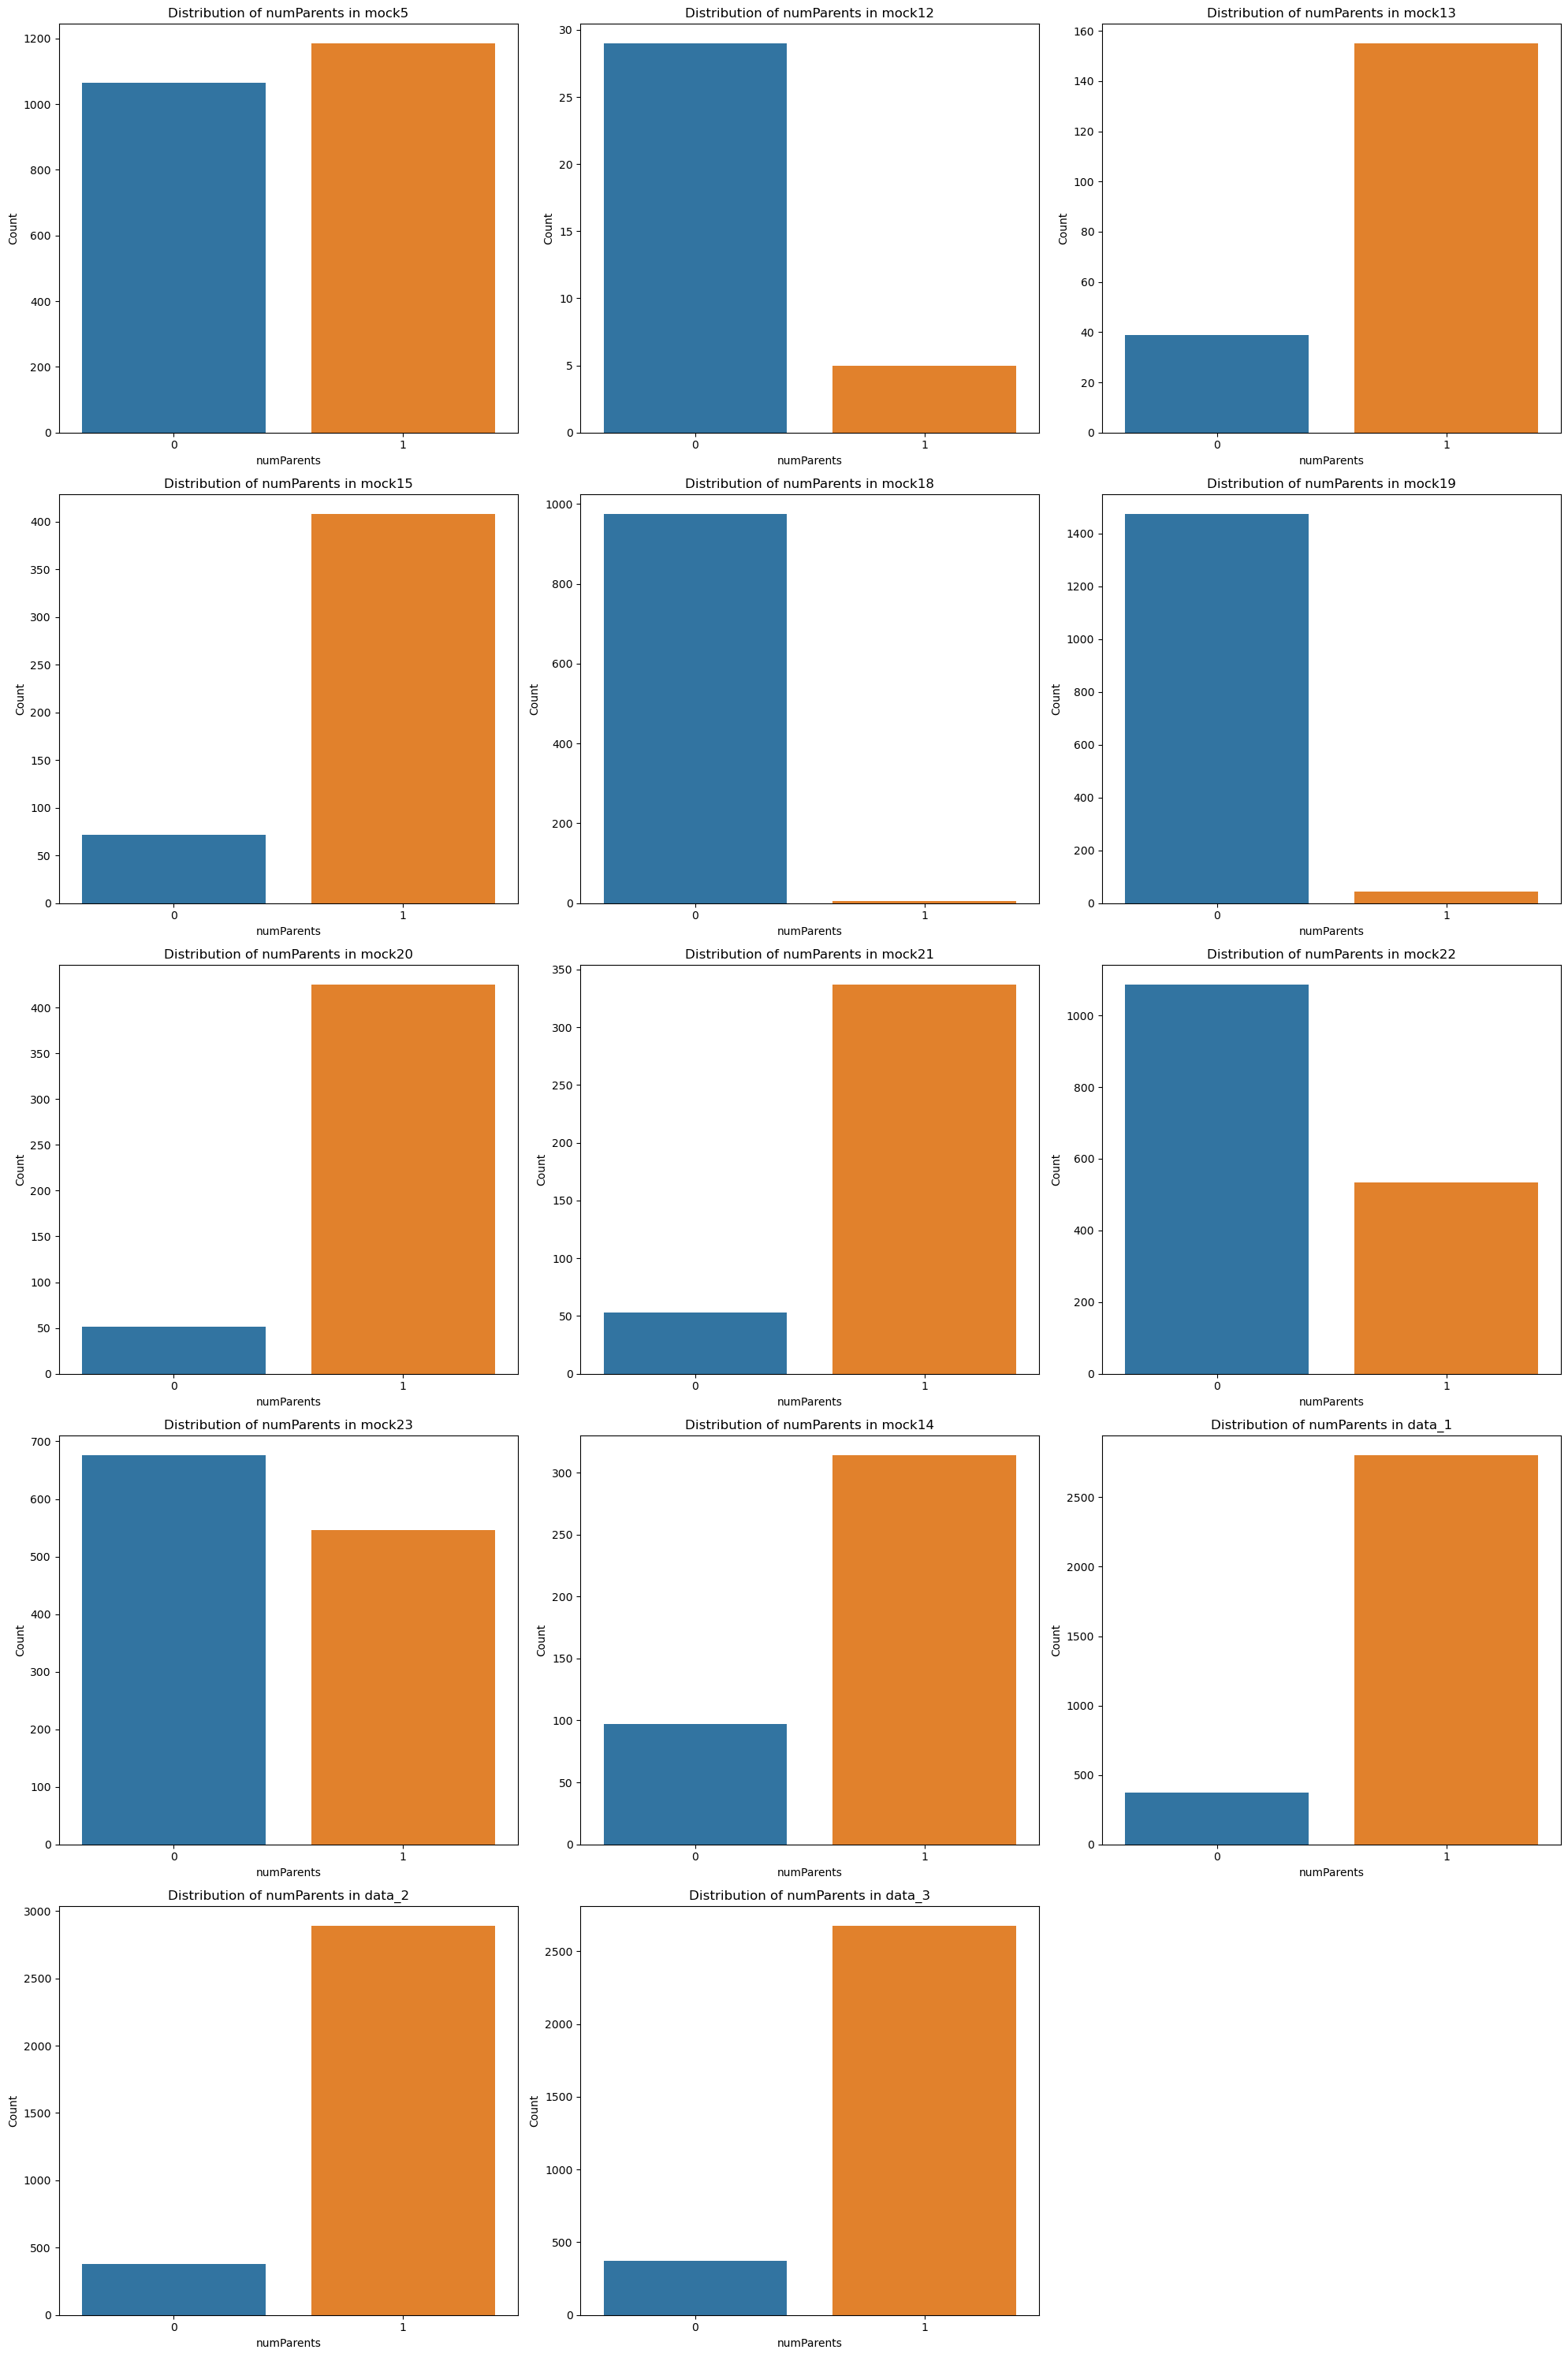

In [7]:
datasets = [mock5, mock12, mock13, mock15, mock18, mock19, mock20, mock21, mock22, mock23, mock14, data_1, data_2, data_3]
dataset_names = ['mock5', 'mock12', 'mock13', 'mock15', 'mock18', 'mock19', 'mock20', 'mock21', 'mock22', 'mock23', 'mock14', 'data_1', 'data_2', 'data_3']

plt.figure(figsize=(20, 30))

for i, (dataset, name) in enumerate(zip(datasets, dataset_names), 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=dataset, x='numParents')
    plt.title(f'Distribution of numParents in {name}')
    plt.xlabel('numParents')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

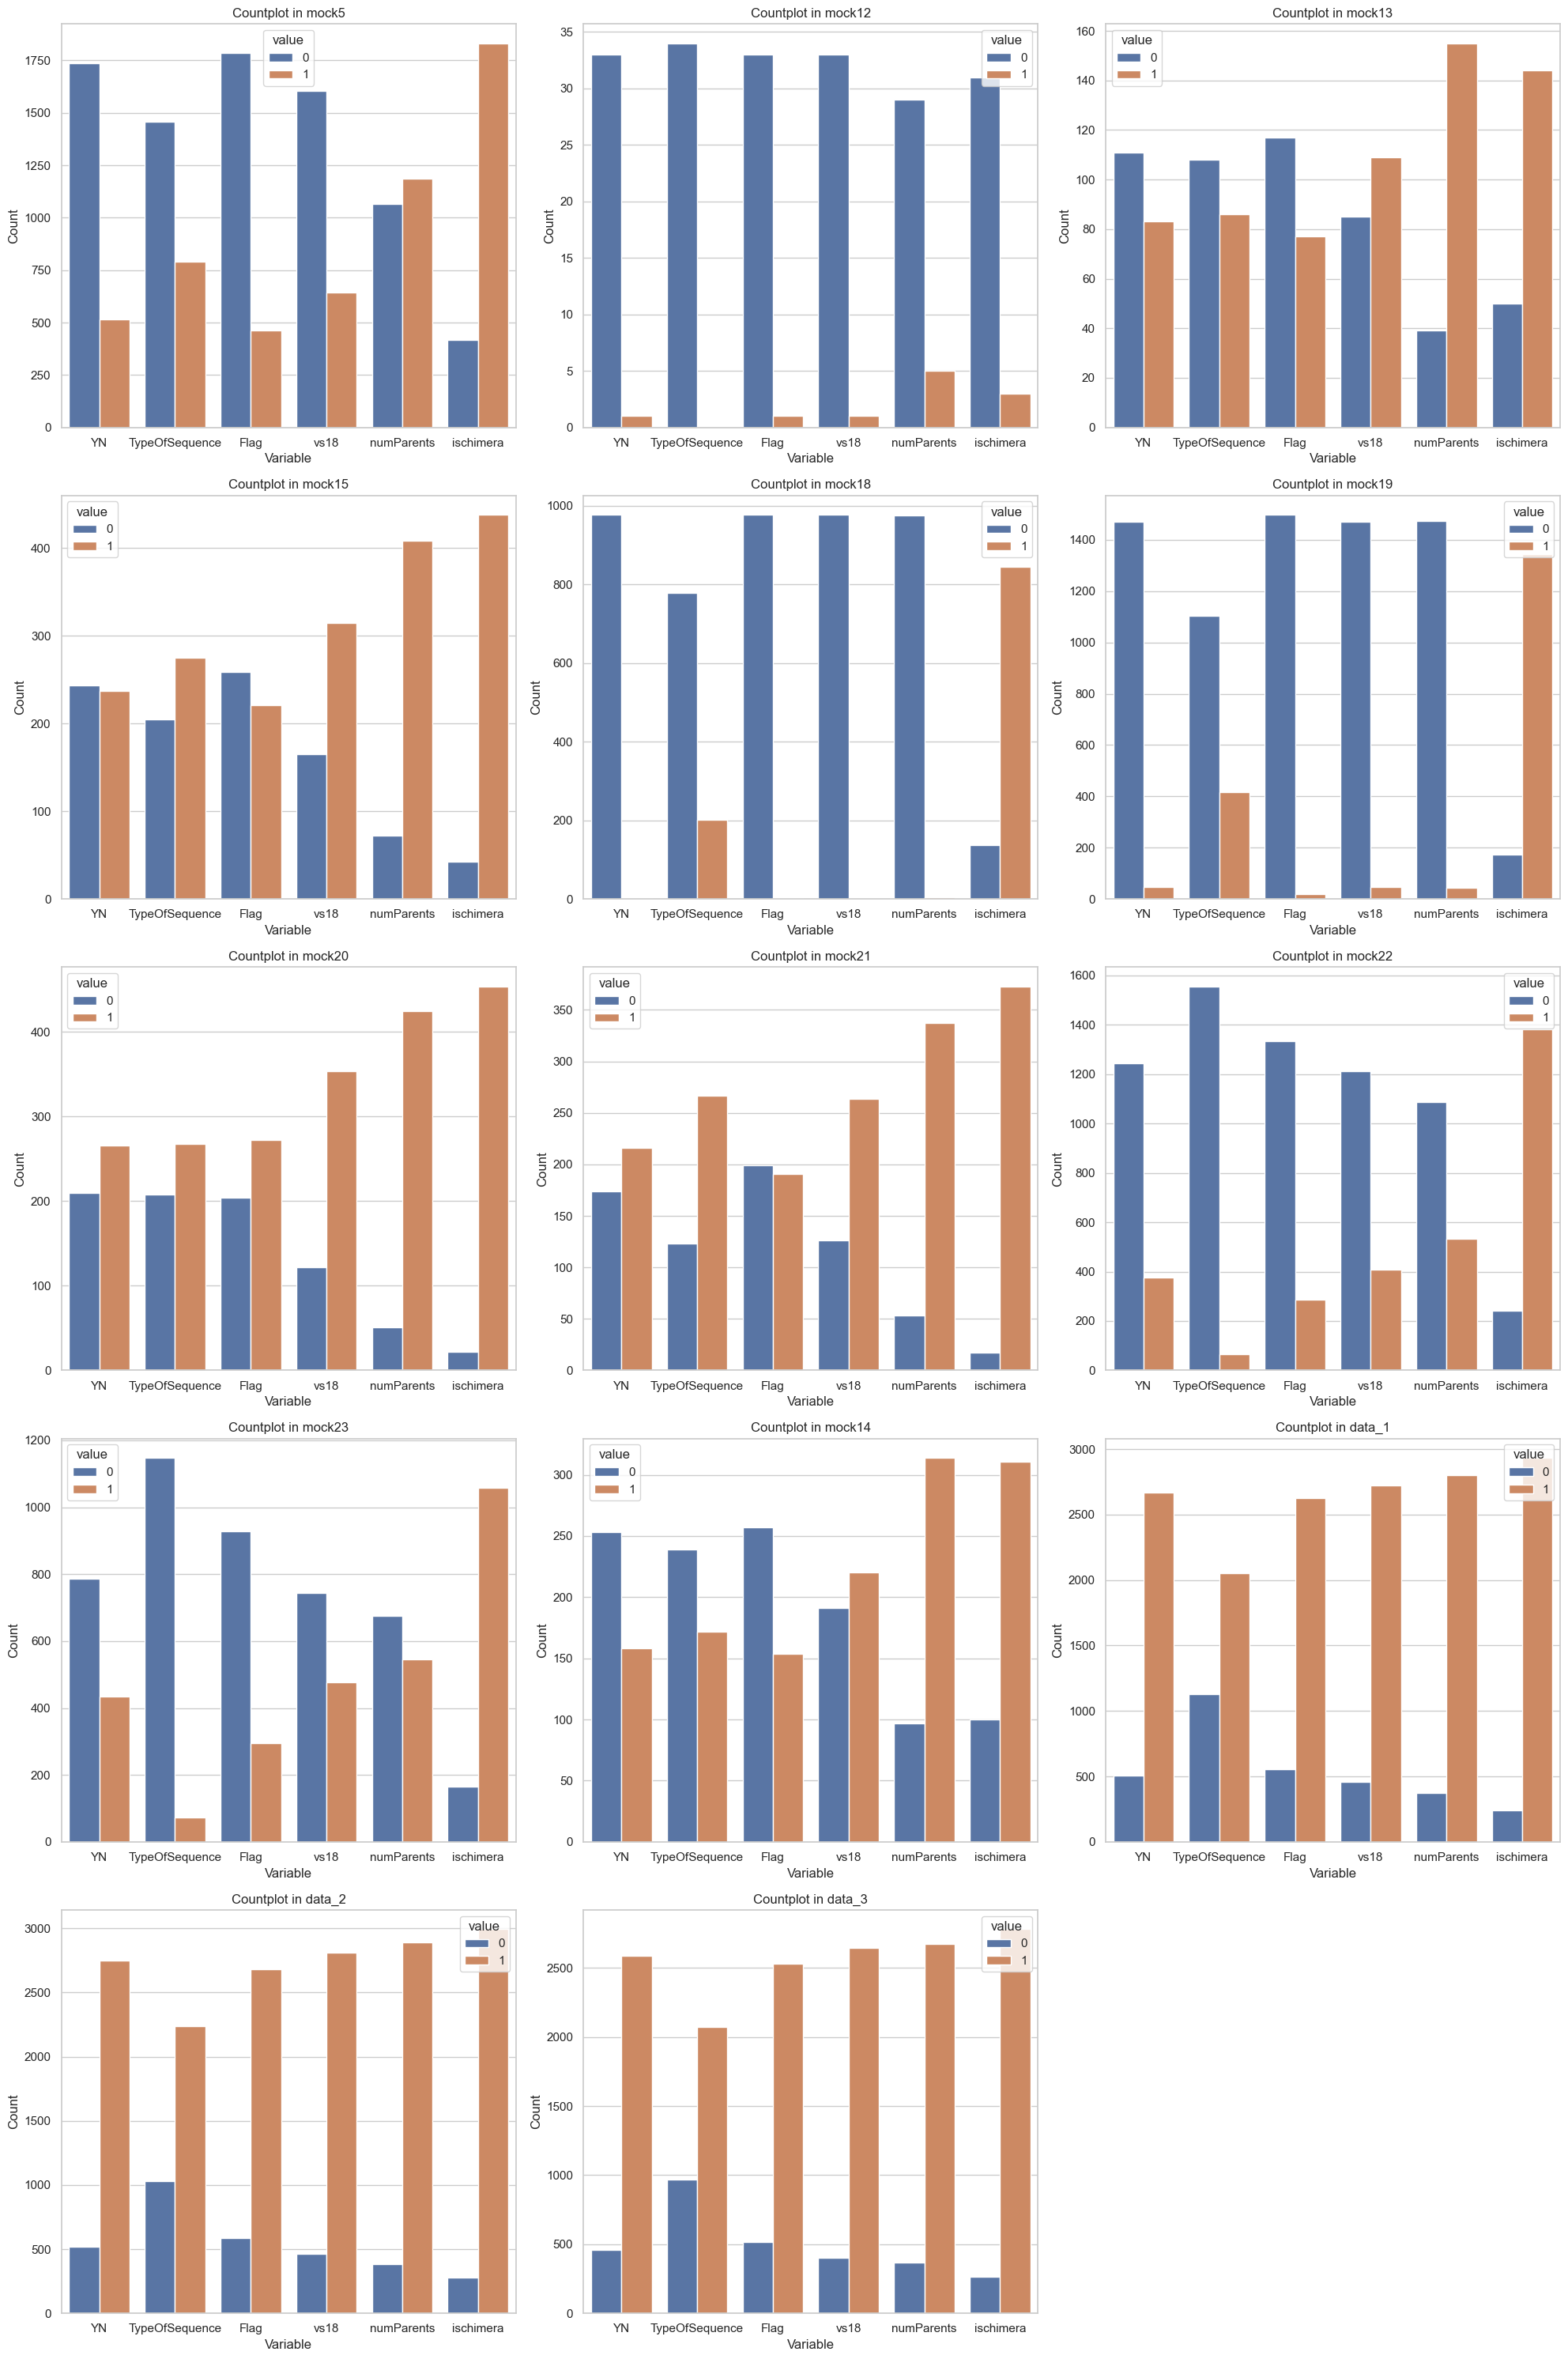

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming datasets and dataset_names are already defined
datasets = [mock5, mock12, mock13, mock15, mock18, mock19, mock20, mock21, mock22, mock23, mock14, data_1, data_2, data_3]
dataset_names = ['mock5', 'mock12', 'mock13', 'mock15', 'mock18', 'mock19', 'mock20', 'mock21', 'mock22', 'mock23', 'mock14', 'data_1', 'data_2', 'data_3']

# Define the columns to be melted
columns_to_melt = ['YN', 'TypeOfSequence', 'Flag', 'vs18', 'numParents', 'ischimera']

# Plotting the countplot for each dataset
plt.figure(figsize=(20, 30))

for i, (dataset, name) in enumerate(zip(datasets, dataset_names), 1):
    plt.subplot(5, 3, i)
    melted_data = pd.melt(dataset[columns_to_melt])
    # Ensure the 'value' column is string type to avoid the error
    melted_data['value'] = melted_data['value'].astype(str)
    sns.countplot(x="variable", hue="value", data=melted_data)
    plt.title(f'Countplot in {name}')
    plt.xlabel('Variable')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [10]:
dataframes = {
    'mock5': mock5, 'mock12': mock12, 'mock13': mock13, 'mock15': mock15,
    'mock18': mock18, 'mock19': mock19, 'mock20': mock20, 'mock21': mock21,
    'mock22': mock22, 'mock23': mock23,'mock14':mock14,  'data_1' :data_1 , 'data_2' :data_2 , 'data_3' :data_3
}

In [8]:
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera','uchime3']


In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assume 'tools' is a list of your tools or classifiers
#tools = ['tool1', 'tool2']  # Example tools
# Dictionary for mock DataFrames and their names
mocks = {
    'mock5': mock5,
    'mock12': mock12,
    'mock13': mock13,
    'mock15': mock15,
    'mock18': mock18,
    'mock19': mock19,
    'mock20': mock20,
    'mock21': mock21,
    'mock22': mock22,
    'mock23': mock23,
    'mock14': mock14,
    'data_1' : data_1,
    'data_2' : data_2 ,
    'data_3': data_3
}

aggregate_metrics = {tool: [] for tool in tools}

for mock_name, df in mocks.items():
    for tool in tools:
        tp, fn, fp, tn = confusion_matrix(df['numParents'], df[tool], labels=[1,0]).ravel()
        accuracy = accuracy_score(df['numParents'], df[tool])
        precision = precision_score(df['numParents'], df[tool], zero_division=0)
        recall = recall_score(df['numParents'], df[tool], zero_division=0)
        f1 = f1_score(df['numParents'], df[tool], zero_division=0)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

        aggregate_metrics[tool].append({
            'Mock Name': mock_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Specificity': specificity
        })

for tool, metrics in aggregate_metrics.items():
    print(f"Metrics for {tool}:")
    metrics_df = pd.DataFrame(metrics)
    print(metrics_df)
    print()


Metrics for vs18:
   Mock Name  Accuracy  Precision    Recall  F1 Score  Specificity
0      mock5  0.758667   0.998447  0.542616  0.703116     0.999061
1     mock12  0.882353   1.000000  0.200000  0.333333     1.000000
2     mock13  0.690722   0.935780  0.658065  0.772727     0.820513
3     mock15  0.747917   0.955556  0.737745  0.832642     0.805556
4     mock18  0.997959   1.000000  0.600000  0.750000     1.000000
5     mock19  0.998682   0.956522  1.000000  0.977778     0.998643
6     mock20  0.787815   0.957627  0.797647  0.870347     0.705882
7     mock21  0.787179   0.981061  0.768546  0.861897     0.905660
8     mock22  0.920370   0.997543  0.760300  0.862912     0.999079
9     mock23  0.936170   0.989540  0.866300  0.923828     0.992604
10    mock14  0.673966   0.909091  0.636943  0.749064     0.793814
11    data_1  0.961296   0.992285  0.963610  0.977738     0.944000
12    data_2  0.966677   0.995016  0.967128  0.980874     0.963255
13    data_3  0.974713   0.991301  0.979813 

In [94]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence', 'ischimera', 'uchime3']

metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

mocks = [mock5, mock12, mock13, mock15, mock18, mock19, mock20, mock21, mock22, mock23 , mock14 , data_1,data_2,data_3]

for mock in mocks:
    mock_df = mock 
    for tool in tools:
        tp, fn, fp, tn = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[1, 0]).ravel()

        # Calculate each metric and append to the list for each tool
        metrics[tool]['Accuracy'].append(accuracy_score(mock_df['numParents'], mock_df[tool]))
        metrics[tool]['Precision'].append(precision_score(mock_df['numParents'], mock_df[tool]))
        metrics[tool]['Recall'].append(recall_score(mock_df['numParents'], mock_df[tool]))
        metrics[tool]['F1 Score'].append(f1_score(mock_df['numParents'], mock_df[tool]))
        metrics[tool]['Specificity'].append(tn / (tn + fp) if (tn + fp) != 0 else float('nan'))  # Handle division by zero
        metrics[tool]['Sensitivity'].append(recall_score(mock_df['numParents'], mock_df[tool]))  # Sensitivity is the same as recall

average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

average_metrics_df = pd.DataFrame(average_metrics).T

average_metrics_df


C:\Users\Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.863178,0.975698,0.748479,0.827270,0.918993,0.748479
YN,0.816894,0.990104,0.673888,0.778288,0.980780,0.673888
Flag,0.787544,0.984833,0.582418,0.711031,0.971841,0.582418
TypeOfSequence,0.735831,0.747772,0.563216,0.554761,0.943808,0.563216
ischimera,0.702551,0.655123,0.879343,0.694339,0.394303,0.879343
uchime3,0.604930,0.651024,0.788365,0.632033,0.427656,0.788365


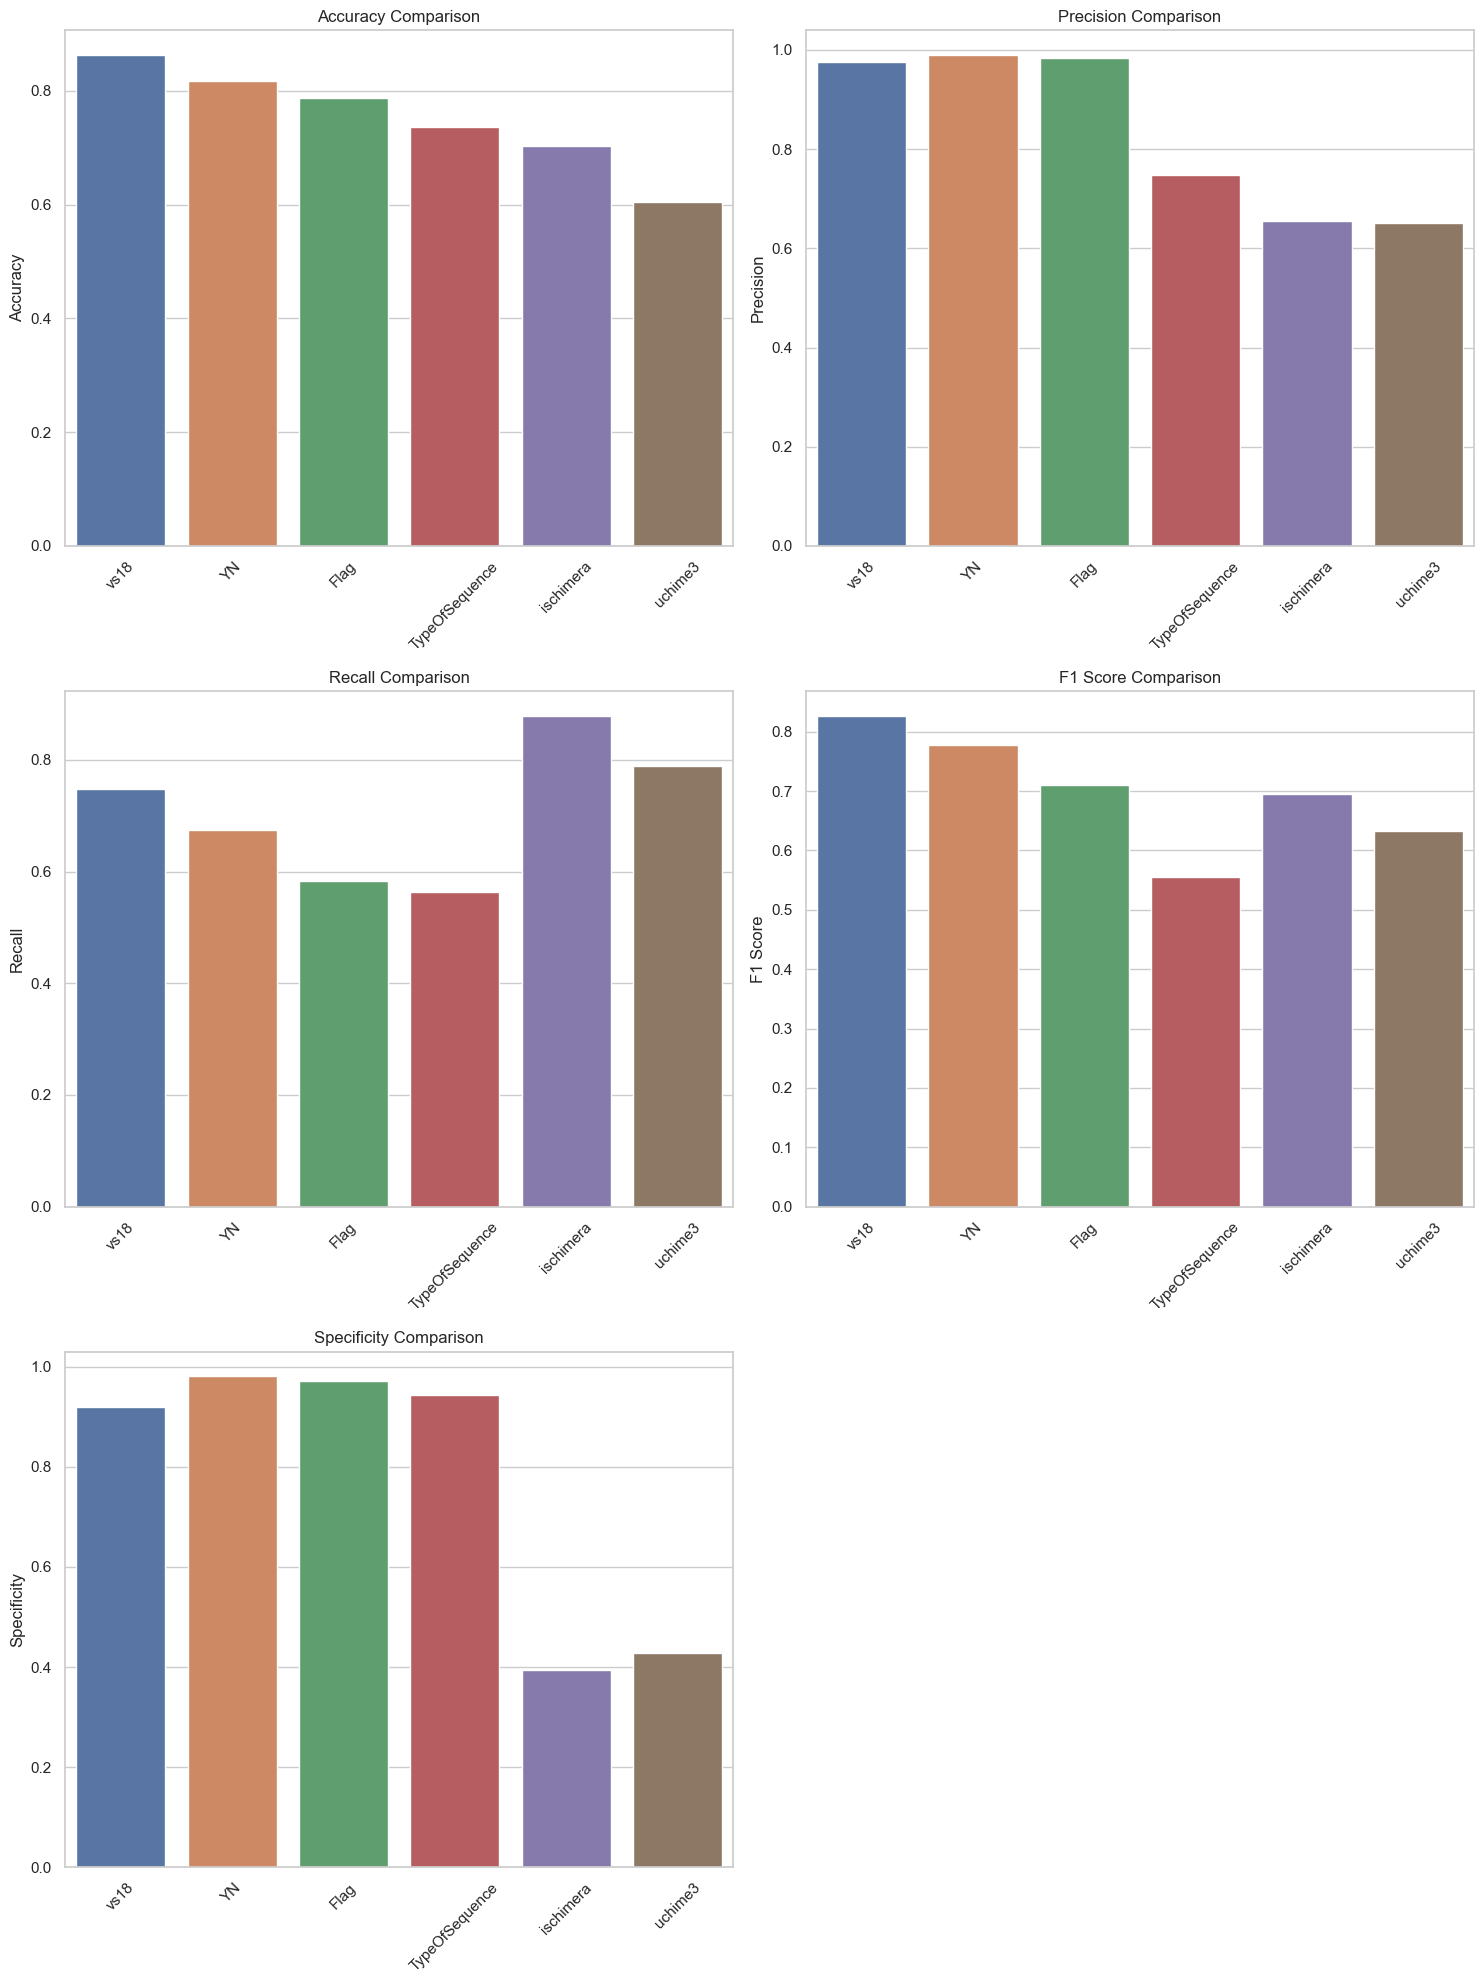

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# List of all metrics for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']

# Create a figure with subplots arranged in 2x3 grid (since we have 5 metrics)
fig, axes = plt.subplots(3, 2, figsize=(15, 20)) # Adjust the size as needed
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Loop through the metrics and create a bar plot for each
for i, metric in enumerate(metrics):
    # Create a bar plot for the current metric
    sns.barplot(x=average_metrics_df.index, y=average_metrics_df[metric], ax=axes[i])
    # Set the title for the subplot
    axes[i].set_title(metric + ' Comparison')
    # Rotate the x labels for better readability
    axes[i].set_xticklabels(average_metrics_df.index, rotation=45)
    # Set the y-axis label
    axes[i].set_ylabel(metric)

# Remove the empty subplot (if any, as we have 5 metrics but 6 slots)
if len(metrics) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
import pandas as pd

dfs = [(mock5, 5),(mock13, 13), (mock15, 15), (mock18,18),
       (mock19, 19), (mock20, 20), (mock21, 21),(mock22,22), (mock23, 23), (mock14,14) ,(mock12, 12),
      ]

for df, mock_id in dfs:
    df['mock_id'] = mock_id

combined_df = pd.concat([df for df, _ in dfs])



In [10]:
train_df=[(mock12,12),(mock15,15),(mock19,19),(mock20,20)]
for df, mock_id in train_df:
    df['mock_id'] = mock_id

train_df_combined = pd.concat([train_df for train_df, _ in train_df])


In [11]:
test_df=[(mock5,5),(mock18,18),(mock14,14)]
for df, mock_id in test_df:
    df['mock_id'] = mock_id

test_df_combined = pd.concat([test_df for test_df, _ in test_df])


In [12]:
import pandas as pd

validation = [(data_1, 1) , (data_2 , 2) , (data_3,3) , (mock21,21) , (mock22,22),(mock23,23),(mock13,13)]

for val_df, mock_id in validation:
    val_df['mock_id'] = mock_id

val_df_combined = pd.concat([val_df for val_df, _ in validation])


In [17]:
val_df_combined.shape

(12920, 55)

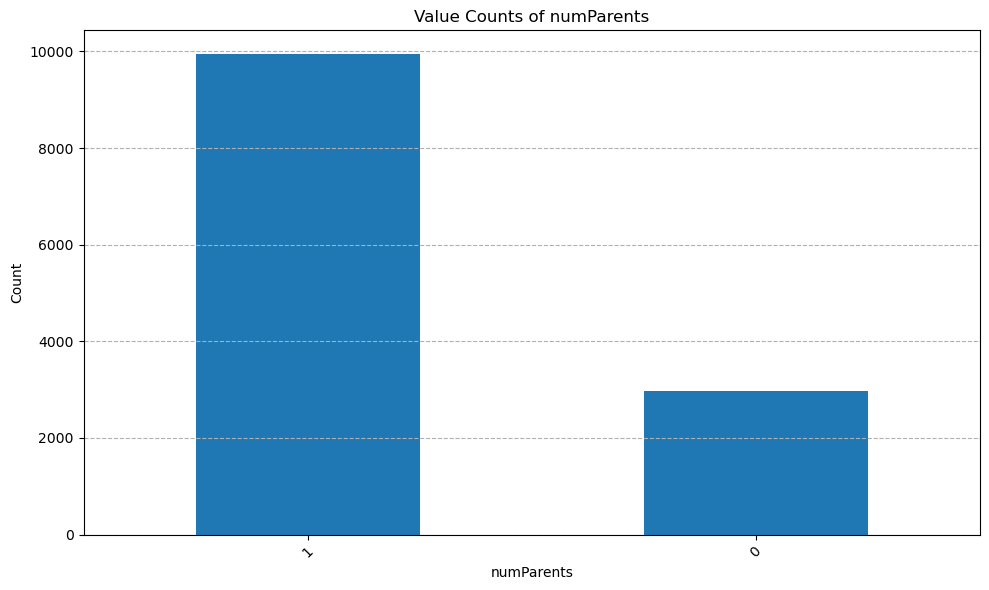

In [13]:
import matplotlib.pyplot as plt

value_counts = val_df_combined['numParents'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of numParents')
plt.xlabel('numParents')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# <font color=red> **Train&Test** </font>

#LGM

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import lightgbm as lgb

LGM_train_mocks = [15, 12, 19, 20]
LGM_test_mocks = [5, 18, 14]

train_df = combined_df[combined_df['mock_id'].isin(LGM_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(LGM_test_mocks)]

drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]


XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']

# Define a pipeline with an imputer and a scaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit and transform the training data, transform the test data
XX_train_processed = pipeline.fit_transform(XX_train)
XX_test_processed = pipeline.transform(XX_test)

# Check for any remaining NaNs in the processed data
assert not np.any(np.isnan(XX_train_processed)), "NaNs found in XX_train_processed"
assert not np.any(np.isnan(XX_test_processed)), "NaNs found in XX_test_processed"

# Initialize and train the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42)
lgb_clf.fit(XX_train_processed, yy_train)

# Helper function to calculate metrics
def calculate_metrics(yy_true, yy_pred):
    conf_matrix = confusion_matrix(yy_true, yy_pred)
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
    f1 = f1_score(yy_true, yy_pred)
    precision = precision_score(yy_true, yy_pred)
    return sensitivity, specificity, accuracy, f1, precision

# Calculate metrics for training set
train_probabilities = lgb_clf.predict_proba(XX_train_processed)[:, 1]
train_predictions = (train_probabilities >= 0.48).astype(int)
train_sensitivity, train_specificity, train_accuracy, train_f1, train_precision = calculate_metrics(yy_train, train_predictions)

# Calculate metrics for test set
test_probabilities = lgb_clf.predict_proba(XX_test_processed)[:, 1]
test_predictions = (test_probabilities >= 0.48).astype(int)
test_sensitivity, test_specificity, test_accuracy, test_f1, test_precision = calculate_metrics(yy_test, test_predictions)

# Print average results for train and test sets
print("Average Results for Training Set:")
print(f"Sensitivity: {train_sensitivity:.2f}")
print(f"Specificity: {train_specificity:.2f}")
print(f"Accuracy: {train_accuracy:.2%}")
print(f"F1 Score: {train_f1:.2f}")
print(f"Precision: {train_precision:.2f}")
print("----------------------")

print("Average Results for Test Set:")
print(f"Sensitivity: {test_sensitivity:.2f}")
print(f"Specificity: {test_specificity:.2f}")
print(f"Accuracy: {test_accuracy:.2%}")
print(f"F1 Score: {test_f1:.2f}")
print(f"Precision: {test_precision:.2f}")
print("----------------------")


# Calculate metrics for each validation mock_id and store results
results_per_mock = []

mock_ids = val_df_combined['mock_id'].unique()
for mock_id in mock_ids:
    val_df = val_df_combined[val_df_combined['mock_id'] == mock_id]
    XX_val = val_df.drop(columns=drop_columns)
    yy_val = val_df['numParents']
    XX_val_processed = pipeline.transform(XX_val)
    probabilities = lgb_clf.predict_proba(XX_val_processed)[:, 1]

    optimal_threshold = 0.48
    predictions = (probabilities >= optimal_threshold).astype(int)
    sensitivity, specificity, accuracy, f1, precision = calculate_metrics(yy_val, predictions)

    results_per_mock.append({
        'Mock ID': mock_id,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision
    })

    # print(f"Results for Mock ID {mock_id}:")
    # print(f"Sensitivity: {sensitivity:.2f}")
    # print(f"Specificity: {specificity:.2f}")
    # print(f"Accuracy: {accuracy:.2%}")
    # print(f"F1 Score: {f1:.2f}")
    # print(f"Precision: {precision:.2f}")
    # print("----------------------")

average_sensitivity = np.mean([result['Sensitivity'] for result in results_per_mock])
average_specificity = np.mean([result['Specificity'] for result in results_per_mock])
average_accuracy = np.mean([result['Accuracy'] for result in results_per_mock])
average_f1 = np.mean([result['F1 Score'] for result in results_per_mock])
average_precision = np.mean([result['Precision'] for result in results_per_mock])

# print("Average Results Across All Mocks:")
# print(f"Average Sensitivity: {average_sensitivity:.2f}")
# print(f"Average Specificity: {average_specificity:.2f}")
# print(f"Average Accuracy: {average_accuracy:.2%}")
# print(f"Average F1 Score: {average_f1:.2f}")
# print(f"Average Precision: {average_precision:.2f}")

[LightGBM] [Info] Number of positive: 882, number of negative: 1626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3625
[LightGBM] [Info] Number of data points in the train set: 2508, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351675 -> initscore=-0.611686
[LightGBM] [Info] Start training from score -0.611686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Average Results for Training Set:
Sensitivity: 1.00
Specificity: 1.00
Accuracy: 100.00%
F1 Score: 1.00
Precision: 1.00
----------------------
Average Results for Test Set:
Sensitivity: 0.79
Specificity: 0.98
Accuracy: 90.47%
F1 Score: 0.87
Precision: 0.97
----------------------


In [56]:
# #when removing the optimal parameters
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix, f1_score, precision_score
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# import lightgbm as lgb

# LGM_train_mocks = [15, 12, 19, 20]
# LGM_test_mocks = [5, 18, 14]

# train_df = combined_df[combined_df['mock_id'].isin(LGM_train_mocks)]
# test_df = combined_df[combined_df['mock_id'].isin(LGM_test_mocks)]

# drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]

# XX_train = train_df.drop(columns=drop_columns)
# yy_train = train_df['numParents']
# XX_test = test_df.drop(columns=drop_columns)
# yy_test = test_df['numParents']

# # Define a pipeline with an imputer and a scaler
# pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# # Fit and transform the training data, transform the test data
# XX_train_processed = pipeline.fit_transform(XX_train)
# XX_test_processed = pipeline.transform(XX_test)

# # Check for any remaining NaNs in the processed data
# assert not np.any(np.isnan(XX_train_processed)), "NaNs found in XX_train_processed"
# assert not np.any(np.isnan(XX_test_processed)), "NaNs found in XX_test_processed"

# # Initialize and train the LightGBM classifier
# lgb_clf = lgb.LGBMClassifier()
# lgb_clf.fit(XX_train_processed, yy_train)

# # Helper function to calculate metrics
# def calculate_metrics(yy_true, yy_pred):
#     conf_matrix = confusion_matrix(yy_true, yy_pred)
#     sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
#     specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
#     accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
#     f1 = f1_score(yy_true, yy_pred)
#     precision = precision_score(yy_true, yy_pred)
#     return sensitivity, specificity, accuracy, f1, precision

# # Calculate metrics for training set
# train_probabilities = lgb_clf.predict_proba(XX_train_processed)[:, 1]
# train_predictions = (train_probabilities >= 0.48).astype(int)
# train_sensitivity, train_specificity, train_accuracy, train_f1, train_precision = calculate_metrics(yy_train, train_predictions)

# # Calculate metrics for test set
# test_probabilities = lgb_clf.predict_proba(XX_test_processed)[:, 1]
# test_predictions = (test_probabilities >= 0.48).astype(int)
# test_sensitivity, test_specificity, test_accuracy, test_f1, test_precision = calculate_metrics(yy_test, test_predictions)

# # Print average results for train and test sets
# print("Average Results for Training Set:")
# print(f"Sensitivity: {train_sensitivity:.2f}")
# print(f"Specificity: {train_specificity:.2f}")
# print(f"Accuracy: {train_accuracy:.2%}")
# print(f"F1 Score: {train_f1:.2f}")
# print(f"Precision: {train_precision:.2f}")
# print("----------------------")

# print("Average Results for Test Set:")
# print(f"Sensitivity: {test_sensitivity:.2f}")
# print(f"Specificity: {test_specificity:.2f}")
# print(f"Accuracy: {test_accuracy:.2%}")
# print(f"F1 Score: {test_f1:.2f}")
# print(f"Precision: {test_precision:.2f}")
# print("----------------------")

# # Calculate metrics for each validation mock_id and store results
# results_per_mock = []

# mock_ids = val_df_combined['mock_id'].unique()
# for mock_id in mock_ids:
#     val_df = val_df_combined[val_df_combined['mock_id'] == mock_id]
#     XX_val = val_df.drop(columns=drop_columns)
#     yy_val = val_df['numParents']
#     XX_val_processed = pipeline.transform(XX_val)
#     probabilities = lgb_clf.predict_proba(XX_val_processed)[:, 1]

#     optimal_threshold = 0.48
#     predictions = (probabilities >= optimal_threshold).astype(int)
#     sensitivity, specificity, accuracy, f1, precision = calculate_metrics(yy_val, predictions)

#     results_per_mock.append({
#         'Mock ID': mock_id,
#         'Sensitivity': sensitivity,
#         'Specificity': specificity,
#         'Accuracy': accuracy,
#         'F1 Score': f1,
#         'Precision': precision
#     })

# average_sensitivity = np.mean([result['Sensitivity'] for result in results_per_mock])
# average_specificity = np.mean([result['Specificity'] for result in results_per_mock])
# average_accuracy = np.mean([result['Accuracy'] for result in results_per_mock])
# average_f1 = np.mean([result['F1 Score'] for result in results_per_mock])
# average_precision = np.mean([result['Precision'] for result in results_per_mock])

# print("Average Results Across All Mocks:")
# print(f"Average Sensitivity: {average_sensitivity:.2f}")
# print(f"Average Specificity: {average_specificity:.2f}")
# print(f"Average Accuracy: {average_accuracy:.2%}")
# print(f"Average F1 Score: {average_f1:.2f}")
# print(f"Average Precision: {average_precision:.2f}")


In [57]:
# #when removing the optimal parameters
# import pandas as pd
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Define tools and initialize the metrics dictionary
# tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence', 'ischimera', 'uchime3']
# metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# # Iterate over each mock id
# for mock in train_df['mock_id'].unique():
#     mock_df = train_df[train_df['mock_id'] == mock]
#     for tool in tools:
#         # Compute confusion matrix and extract its values
#         tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

#         # Calculate and store each metric
#         accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
#         precision = precision_score(mock_df['numParents'], mock_df[tool])
#         recall = recall_score(mock_df['numParents'], mock_df[tool])
#         f1 = f1_score(mock_df['numParents'], mock_df[tool])
#         specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
#         sensitivity = recall  # Sensitivity is the same as recall

#         metrics[tool]['Accuracy'].append(accuracy)
#         metrics[tool]['Precision'].append(precision)
#         metrics[tool]['Recall'].append(recall)
#         metrics[tool]['F1 Score'].append(f1)
#         metrics[tool]['Specificity'].append(specificity)
#         metrics[tool]['Sensitivity'].append(sensitivity)

# # Calculate the average metrics for each tool
# average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# # Convert the dictionary to a DataFrame
# average_metrics_df = pd.DataFrame(average_metrics).T

# # Create a dictionary for training metrics
# train_metrics = {
#     'Accuracy': train_accuracy,
#     'Precision': train_precision,
#     'Recall': train_sensitivity,
#     'F1 Score': train_f1,
#     'Specificity': train_specificity,
#     'Sensitivity': train_sensitivity
# }

# # Convert training metrics dictionary to DataFrame
# new_metrics_df = pd.DataFrame(train_metrics, index=['TrainLGM'])

# # Append this new DataFrame to the existing metrics_df
# metrics_df_av = pd.concat([average_metrics_df, new_metrics_df])

# metrics_df_av


In [58]:
# #when removing the optimal parameters
# import pandas as pd
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Define tools and initialize the metrics dictionary
# tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence', 'ischimera', 'uchime3']
# metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# # Iterate over each mock id
# for mock in test_df['mock_id'].unique():
#     mock_df = test_df[test_df['mock_id'] == mock]
#     for tool in tools:
#         # Compute confusion matrix and extract its values
#         tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

#         # Calculate and store each metric
#         accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
#         precision = precision_score(mock_df['numParents'], mock_df[tool])
#         recall = recall_score(mock_df['numParents'], mock_df[tool])
#         f1 = f1_score(mock_df['numParents'], mock_df[tool])
#         specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
#         sensitivity = recall  # Sensitivity is the same as recall

#         metrics[tool]['Accuracy'].append(accuracy)
#         metrics[tool]['Precision'].append(precision)
#         metrics[tool]['Recall'].append(recall)
#         metrics[tool]['F1 Score'].append(f1)
#         metrics[tool]['Specificity'].append(specificity)
#         metrics[tool]['Sensitivity'].append(sensitivity)

# # Calculate the average metrics for each tool
# average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# # Convert the dictionary to a DataFrame
# average_metrics_df_t = pd.DataFrame(average_metrics).T

# # Create a dictionary for test metrics
# test_metrics = {
#     'Accuracy': test_accuracy,
#     'Precision': test_precision,
#     'Recall': test_sensitivity,
#     'F1 Score': test_f1,
#     'Specificity': test_specificity,
#     'Sensitivity': test_sensitivity
# }

# # Convert test metrics dictionary to DataFrame
# new_metrics_df = pd.DataFrame(test_metrics, index=['TestLGM'])

# # Append this new DataFrame to the existing metrics_df
# metrics_df_avv = pd.concat([average_metrics_df_t, new_metrics_df])

# metrics_df_avv


In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence', 'ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in train_df['mock_id'].unique():
    mock_df = train_df[train_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)
# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df = pd.DataFrame(average_metrics).T

C:\Users\Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
train_metrics = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_sensitivity,
    'F1 Score': train_f1,
    'Specificity': train_specificity,
    'Sensitivity': train_sensitivity
}

In [24]:
new_metrics_df = pd.DataFrame(train_metrics, index=['TrainLGM'])

# Append this new DataFrame to the existing metrics_df
metrics_df_av = pd.concat([average_metrics_df, new_metrics_df])

metrics_df_av

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.854192,0.967426,0.683848,0.753525,0.877520,0.683848
YN,0.797688,0.989130,0.601691,0.703973,0.999661,0.601691
Flag,0.779873,0.966374,0.442836,0.588552,0.969024,0.442836
TypeOfSequence,0.750406,0.526506,0.576152,0.442610,0.937076,0.576152
ischimera,0.693056,0.548716,0.789583,0.551178,0.456749,0.789583
uchime3,0.675599,0.548119,0.789583,0.550055,0.438771,0.789583
TrainLGM,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in test_df['mock_id'].unique():
    mock_df = test_df[test_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)

# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df_t = pd.DataFrame(average_metrics).T

In [26]:
test_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_sensitivity,
    'F1 Score': test_f1,
    'Specificity': test_specificity,
    'Sensitivity': test_sensitivity
}

In [27]:
new_metrics_df = pd.DataFrame(test_metrics, index=['TestLGM'])

# Append this new DataFrame to the existing metrics_df
metrics_df_avv = pd.concat([average_metrics_df_t, new_metrics_df])

metrics_df_avv

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.810197,0.969179,0.593186,0.734060,0.930958,0.593186
YN,0.763807,0.987342,0.506225,0.666650,0.979381,0.506225
Flag,0.755948,0.989187,0.488849,0.649970,0.987813,0.488849
TypeOfSequence,0.753570,0.665828,0.601909,0.508402,0.921998,0.601909
ischimera,0.540802,0.501170,0.814586,0.547055,0.354084,0.814586
uchime3,0.514813,0.507189,0.808217,0.546377,0.353002,0.808217
TestLGM,0.904697,0.969943,0.793883,0.873126,0.982686,0.793883


#Support-Vector-Machine

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming combined_df and val_df_combined are already defined
SVM_train_mocks = [15, 12, 19, 20]
SVM_test_mocks = [5, 18, 14]

train_df = combined_df[combined_df['mock_id'].isin(SVM_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(SVM_test_mocks)]

drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]


XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']

# Define a pipeline with an imputer and a scaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit and transform the training data, transform the test data
XX_train_processed = pipeline.fit_transform(XX_train)
XX_test_processed = pipeline.transform(XX_test)

# Check for any remaining NaNs in the processed data
assert not np.any(np.isnan(XX_train_processed)), "NaNs found in XX_train_processed"
assert not np.any(np.isnan(XX_test_processed)), "NaNs found in XX_test_processed"

# Initialize and train the SVM classifier
svm_clf = SVC(kernel='rbf', C=10, probability=True, gamma='scale', degree=2, random_state=42)
svm_clf.fit(XX_train_processed, yy_train)

# Helper function to calculate metrics
def calculate_metrics(yy_true, yy_pred):
    conf_matrix = confusion_matrix(yy_true, yy_pred)
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
    f1 = f1_score(yy_true, yy_pred)
    precision = precision_score(yy_true, yy_pred)
    return sensitivity, specificity, accuracy, f1, precision

# Calculate metrics for training set
train_probabilities = svm_clf.predict_proba(XX_train_processed)[:, 1]
train_predictions = (train_probabilities >= 0.48).astype(int)
train_sensitivity, train_specificity, train_accuracy, train_f1, train_precision = calculate_metrics(yy_train, train_predictions)

# Calculate metrics for test set
test_probabilities = svm_clf.predict_proba(XX_test_processed)[:, 1]
test_predictions = (test_probabilities >= 0.48).astype(int)
test_sensitivity, test_specificity, test_accuracy, test_f1, test_precision = calculate_metrics(yy_test, test_predictions)

# Print average results for train and test sets
print("Average Results for Training Set:")
print(f"Sensitivity: {train_sensitivity:.2f}")
print(f"Specificity: {train_specificity:.2f}")
print(f"Accuracy: {train_accuracy:.2%}")
print(f"F1 Score: {train_f1:.2f}")
print(f"Precision: {train_precision:.2f}")
print("----------------------")

print("Average Results for Test Set:")
print(f"Sensitivity: {test_sensitivity:.2f}")
print(f"Specificity: {test_specificity:.2f}")
print(f"Accuracy: {test_accuracy:.2%}")
print(f"F1 Score: {test_f1:.2f}")
print(f"Precision: {test_precision:.2f}")
print("----------------------")



Average Results for Training Set:
Sensitivity: 0.96
Specificity: 0.98
Accuracy: 97.53%
F1 Score: 0.96
Precision: 0.97
----------------------
Average Results for Test Set:
Sensitivity: 0.73
Specificity: 0.98
Accuracy: 87.67%
F1 Score: 0.83
Precision: 0.96
----------------------


In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence', 'ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in train_df['mock_id'].unique():
    mock_df = train_df[train_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)
# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df = pd.DataFrame(average_metrics).T

C:\Users\Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
train_metrics = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_sensitivity,
    'F1 Score': train_f1,
    'Specificity': train_specificity,
    'Sensitivity': train_sensitivity
}

In [31]:
new_metrics_df = pd.DataFrame(train_metrics, index=['TrainSVM'])

# Append this new DataFrame to the existing metrics_df
metrics_df_av = pd.concat([average_metrics_df, new_metrics_df])

metrics_df_av

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.854192,0.967426,0.683848,0.753525,0.877520,0.683848
YN,0.797688,0.989130,0.601691,0.703973,0.999661,0.601691
Flag,0.779873,0.966374,0.442836,0.588552,0.969024,0.442836
TypeOfSequence,0.750406,0.526506,0.576152,0.442610,0.937076,0.576152
ischimera,0.693056,0.548716,0.789583,0.551178,0.456749,0.789583
uchime3,0.675599,0.548119,0.789583,0.550055,0.438771,0.789583
TrainSVM,0.975279,0.971264,0.958050,0.964612,0.984625,0.958050


In [32]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in test_df['mock_id'].unique():
    mock_df = test_df[test_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)

# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df_t = pd.DataFrame(average_metrics).T

In [33]:
test_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_sensitivity,
    'F1 Score': test_f1,
    'Specificity': test_specificity,
    'Sensitivity': test_sensitivity
}

In [34]:
new_metrics_df = pd.DataFrame(test_metrics, index=['TestSVM'])

# Append this new DataFrame to the existing metrics_df
metrics_df_avv = pd.concat([average_metrics_df_t, new_metrics_df])

metrics_df_avv

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.810197,0.969179,0.593186,0.734060,0.930958,0.593186
YN,0.763807,0.987342,0.506225,0.666650,0.979381,0.506225
Flag,0.755948,0.989187,0.488849,0.649970,0.987813,0.488849
TypeOfSequence,0.753570,0.665828,0.601909,0.508402,0.921998,0.601909
ischimera,0.540802,0.501170,0.814586,0.547055,0.354084,0.814586
uchime3,0.514813,0.507189,0.808217,0.546377,0.353002,0.808217
TestSVM,0.876682,0.956710,0.734707,0.831140,0.976603,0.734707


#Random-Classifier

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming combined_df and val_df_combined are already defined
Random_train_mocks = [15, 12, 19, 20]
Random_test_mocks = [5, 18, 14]

train_df = combined_df[combined_df['mock_id'].isin(Random_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(Random_test_mocks)]

drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]

XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']

# Define a pipeline with an imputer and a scaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit and transform the training data, transform the test data
XX_train_processed = pipeline.fit_transform(XX_train)
XX_test_processed = pipeline.transform(XX_test)

# Check for any remaining NaNs in the processed data
assert not np.any(np.isnan(XX_train_processed)), "NaNs found in XX_train_processed"
assert not np.any(np.isnan(XX_test_processed)), "NaNs found in XX_test_processed"

# Initialize and train the RandomForest classifier
rf_clf = RandomForestClassifier(random_state=42, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf_clf.fit(XX_train_processed, yy_train)

# Helper function to calculate metrics
def calculate_metrics(yy_true, yy_pred):
    conf_matrix = confusion_matrix(yy_true, yy_pred)
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
    f1 = f1_score(yy_true, yy_pred)
    precision = precision_score(yy_true, yy_pred)
    return sensitivity, specificity, accuracy, f1, precision

# Calculate metrics for training set
train_predictions = rf_clf.predict(XX_train_processed)
train_sensitivity, train_specificity, train_accuracy, train_f1, train_precision = calculate_metrics(yy_train, train_predictions)

# Calculate metrics for test set
test_predictions = rf_clf.predict(XX_test_processed)
test_sensitivity, test_specificity, test_accuracy, test_f1, test_precision = calculate_metrics(yy_test, test_predictions)

# Print average results for train and test sets
print("Average Results for Training Set:")
print(f"Sensitivity: {train_sensitivity:.2f}")
print(f"Specificity: {train_specificity:.2f}")
print(f"Accuracy: {train_accuracy:.2%}")
print(f"F1 Score: {train_f1:.2f}")
print(f"Precision: {train_precision:.2f}")
print("----------------------")

print("Average Results for Test Set:")
print(f"Sensitivity: {test_sensitivity:.2f}")
print(f"Specificity: {test_specificity:.2f}")
print(f"Accuracy: {test_accuracy:.2%}")
print(f"F1 Score: {test_f1:.2f}")
print(f"Precision: {test_precision:.2f}")
print("----------------------")


Average Results for Training Set:
Sensitivity: 1.00
Specificity: 1.00
Accuracy: 100.00%
F1 Score: 1.00
Precision: 1.00
----------------------
Average Results for Test Set:
Sensitivity: 0.93
Specificity: 0.98
Accuracy: 96.10%
F1 Score: 0.95
Precision: 0.97
----------------------


In [73]:
print(train_df.columns)

Index(['Score', 'numParents', 'IdQM', 'IdQA', 'IdQB', 'IdAB', 'IdQT', 'LY',
       'LN', 'LA', 'RY', 'RN', 'RA', 'Div', 'YN', 'DiffsToBestMatch',
       'BestMatchIndex', 'DiffstToChimera', 'IndexofLeftParent',
       'IndexOfRightParent', 'DistanceToBestMatch', 'cIndex',
       '(cIndex - singleDist)', 'loonIndex', 'MismatchesToChimera',
       'MismatchToTrimera', 'ChimeraBreakPoint', 'LogisticProbability',
       'TypeOfSequence', 'DivQLAQRB', 'PerIDQLAQRB', 'BootStrapA', 'DivQLBQRA',
       'PerIDQLBQRA', 'BootStrapB', 'Flag', 'vs1', 'vs6', 'vs7', 'vs8', 'vs9',
       'vs10', 'vs11', 'vs12', 'vs13', 'vs14', 'vs15', 'vs16', 'vs17', 'vs18',
       'YN_', 'ischimera', 'uchime3', 'abundance', 'mock_id'],
      dtype='object')


In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in train_df['mock_id'].unique():
    mock_df = train_df[train_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)

# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df = pd.DataFrame(average_metrics).T

C:\Users\Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
train_metrics = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_sensitivity,
    'F1 Score': train_f1,
    'Specificity': train_specificity,
    'Sensitivity': train_sensitivity
}

In [38]:
new_metrics_df = pd.DataFrame(train_metrics, index=['TrainRandom'])

# Append this new DataFrame to the existing metrics_df
metrics_df_av = pd.concat([average_metrics_df, new_metrics_df])

metrics_df_av

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.854192,0.967426,0.683848,0.753525,0.877520,0.683848
YN,0.797688,0.989130,0.601691,0.703973,0.999661,0.601691
Flag,0.779873,0.966374,0.442836,0.588552,0.969024,0.442836
TypeOfSequence,0.750406,0.526506,0.576152,0.442610,0.937076,0.576152
ischimera,0.693056,0.548716,0.789583,0.551178,0.456749,0.789583
uchime3,0.675599,0.548119,0.789583,0.550055,0.438771,0.789583
TrainRandom,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in test_df['mock_id'].unique():
    mock_df = test_df[test_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)

# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df_t = pd.DataFrame(average_metrics).T

In [40]:
test_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_sensitivity,
    'F1 Score': test_f1,
    'Specificity': test_specificity,
    'Sensitivity': test_sensitivity
}

In [41]:
new_metrics_df = pd.DataFrame(test_metrics, index=['TestRandom'])

# Append this new DataFrame to the existing metrics_df
metrics_df_avv = pd.concat([average_metrics_df_t, new_metrics_df])

metrics_df_avv

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.810197,0.969179,0.593186,0.734060,0.930958,0.593186
YN,0.763807,0.987342,0.506225,0.666650,0.979381,0.506225
Flag,0.755948,0.989187,0.488849,0.649970,0.987813,0.488849
TypeOfSequence,0.753570,0.665828,0.601909,0.508402,0.921998,0.601909
ischimera,0.540802,0.501170,0.814586,0.547055,0.354084,0.814586
uchime3,0.514813,0.507189,0.808217,0.546377,0.353002,0.808217
TestRandom,0.961000,0.970954,0.933511,0.951864,0.980346,0.933511


#Neural Network

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

# Assuming combined_df and val_df_combined are defined earlier in your script

# Define the best train and test mocks
Neural_train_mocks = [15, 12, 19, 20]
Neural_test_mocks = [5, 18, 14]  # Use list instead of tuple for consistency

# Filter train and test data
train_df = combined_df[combined_df['mock_id'].isin(Neural_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(Neural_test_mocks)]

# Define columns to drop
drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]


# Prepare train and test data
XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
XX_train_imputed = imputer.fit_transform(XX_train)
XX_test_imputed = imputer.transform(XX_test)

# Standardize the data
scaler = StandardScaler()
XX_train_scaled = scaler.fit_transform(XX_train_imputed)
XX_test_scaled = scaler.transform(XX_test_imputed)

# Define and train the neural network model with modified hyperparameters
nn_clf = MLPClassifier(hidden_layer_sizes=(150, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_clf.fit(XX_train_scaled, yy_train)

# Function to calculate metrics
def calculate_metrics(yy_true, yy_pred):
    conf_matrix = confusion_matrix(yy_true, yy_pred)
    sensitivity = recall_score(yy_true, yy_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if conf_matrix[0, 0] + conf_matrix[0, 1] > 0 else 0
    accuracy = accuracy_score(yy_true, yy_pred)
    f1 = f1_score(yy_true, yy_pred)
    precision = precision_score(yy_true, yy_pred)
    return sensitivity, specificity, accuracy, f1, precision

# Calculate metrics for training set
train_predictions = nn_clf.predict(XX_train_scaled)
train_sensitivity, train_specificity, train_accuracy, train_f1, train_precision = calculate_metrics(yy_train, train_predictions)

# Calculate metrics for test set
test_predictions = nn_clf.predict(XX_test_scaled)
test_sensitivity, test_specificity, test_accuracy, test_f1, test_precision = calculate_metrics(yy_test, test_predictions)

# Print average results for train and test sets
print("Average Results for Training Set:")
print(f"Sensitivity: {train_sensitivity:.2f}")
print(f"Specificity: {train_specificity:.2f}")
print(f"Accuracy: {train_accuracy:.2%}")
print(f"F1 Score: {train_f1:.2f}")
print(f"Precision: {train_precision:.2f}")
print("----------------------")

print("Average Results for Test Set:")
print(f"Sensitivity: {test_sensitivity:.2f}")
print(f"Specificity: {test_specificity:.2f}")
print(f"Accuracy: {test_accuracy:.2%}")
print(f"F1 Score: {test_f1:.2f}")
print(f"Precision: {test_precision:.2f}")
print("----------------------")



Average Results for Training Set:
Sensitivity: 1.00
Specificity: 1.00
Accuracy: 99.84%
F1 Score: 1.00
Precision: 1.00
----------------------
Average Results for Test Set:
Sensitivity: 0.74
Specificity: 0.97
Accuracy: 87.72%
F1 Score: 0.83
Precision: 0.95
----------------------


In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in train_df['mock_id'].unique():
    mock_df = train_df[train_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)

# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df = pd.DataFrame(average_metrics).T

C:\Users\Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
train_metrics = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_sensitivity,
    'F1 Score': train_f1,
    'Specificity': train_specificity,
    'Sensitivity': train_sensitivity
}

In [45]:
new_metrics_df = pd.DataFrame(train_metrics, index=['TrainNeural'])

# Append this new DataFrame to the existing metrics_df
metrics_df_av = pd.concat([average_metrics_df, new_metrics_df])

metrics_df_av

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.854192,0.967426,0.683848,0.753525,0.877520,0.683848
YN,0.797688,0.989130,0.601691,0.703973,0.999661,0.601691
Flag,0.779873,0.966374,0.442836,0.588552,0.969024,0.442836
TypeOfSequence,0.750406,0.526506,0.576152,0.442610,0.937076,0.576152
ischimera,0.693056,0.548716,0.789583,0.551178,0.456749,0.789583
uchime3,0.675599,0.548119,0.789583,0.550055,0.438771,0.789583
TrainNeural,0.998405,0.997732,0.997732,0.997732,0.998770,0.997732


In [46]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in test_df['mock_id'].unique():
    mock_df = test_df[test_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)

# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df_t = pd.DataFrame(average_metrics).T

In [47]:
test_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_sensitivity,
    'F1 Score': test_f1,
    'Specificity': test_specificity,
    'Sensitivity': test_sensitivity
}

In [48]:
new_metrics_df = pd.DataFrame(test_metrics, index=['TestNeural'])

# Append this new DataFrame to the existing metrics_df
metrics_df_avv = pd.concat([average_metrics_df_t, new_metrics_df])

metrics_df_avv

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.810197,0.969179,0.593186,0.734060,0.930958,0.593186
YN,0.763807,0.987342,0.506225,0.666650,0.979381,0.506225
Flag,0.755948,0.989187,0.488849,0.649970,0.987813,0.488849
TypeOfSequence,0.753570,0.665828,0.601909,0.508402,0.921998,0.601909
ischimera,0.540802,0.501170,0.814586,0.547055,0.354084,0.814586
uchime3,0.514813,0.507189,0.808217,0.546377,0.353002,0.808217
TestNeural,0.877232,0.952096,0.740027,0.832772,0.973795,0.740027


#XGBOOST

In [49]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score

# Assuming combined_df and val_df_combined are already defined
XGB_train_mocks = [15, 12, 19, 20]
XGB_test_mocks = [5, 18, 14]

train_df = combined_df[combined_df['mock_id'].isin(XGB_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(XGB_test_mocks)]

drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]


XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']

scaler = StandardScaler()
XX_train_scaled = scaler.fit_transform(XX_train)
XX_test_scaled = scaler.transform(XX_test)

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=15,
    n_estimators=600,
    learning_rate=0.001,
    subsample=0.8,
    colsample_bytree=0.2,
    random_state=42
)
xgb_clf.fit(XX_train_scaled, yy_train)

# Helper function to calculate metrics
def calculate_metrics(yy_true, yy_pred):
    conf_matrix = confusion_matrix(yy_true, yy_pred)
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
    f1 = f1_score(yy_true, yy_pred)
    precision = precision_score(yy_true, yy_pred)
    return sensitivity, specificity, accuracy, f1, precision

# Calculate metrics for training set
train_probabilities = xgb_clf.predict_proba(XX_train_scaled)[:, 1]
train_predictions = (train_probabilities >= 0.48).astype(int)
train_sensitivity, train_specificity, train_accuracy, train_f1, train_precision = calculate_metrics(yy_train, train_predictions)

# Calculate metrics for test set
test_probabilities = xgb_clf.predict_proba(XX_test_scaled)[:, 1]
test_predictions = (test_probabilities >= 0.48).astype(int)
test_sensitivity, test_specificity, test_accuracy, test_f1, test_precision = calculate_metrics(yy_test, test_predictions)

# Print average results for train and test sets
print("Average Results for Training Set:")
print(f"Sensitivity: {train_sensitivity:.2f}")
print(f"Specificity: {train_specificity:.2f}")
print(f"Accuracy: {train_accuracy:.2%}")
print(f"F1 Score: {train_f1:.2f}")
print(f"Precision: {train_precision:.2f}")
print("----------------------")

print("Average Results for Test Set:")
print(f"Sensitivity: {test_sensitivity:.2f}")
print(f"Specificity: {test_specificity:.2f}")
print(f"Accuracy: {test_accuracy:.2%}")
print(f"F1 Score: {test_f1:.2f}")
print(f"Precision: {test_precision:.2f}")
print("----------------------")


Average Results for Training Set:
Sensitivity: 0.93
Specificity: 0.99
Accuracy: 97.21%
F1 Score: 0.96
Precision: 0.99
----------------------
Average Results for Test Set:
Sensitivity: 0.70
Specificity: 0.99
Accuracy: 87.37%
F1 Score: 0.82
Precision: 0.99
----------------------


In [50]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in train_df['mock_id'].unique():
    mock_df = train_df[train_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)

# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df = pd.DataFrame(average_metrics).T

C:\Users\Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
train_metrics = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_sensitivity,
    'F1 Score': train_f1,
    'Specificity': train_specificity,
    'Sensitivity': train_sensitivity
}

In [52]:
new_metrics_df = pd.DataFrame(train_metrics, index=['TrainXGB'])

# Append this new DataFrame to the existing metrics_df
metrics_df_av = pd.concat([average_metrics_df, new_metrics_df])

metrics_df_av

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.854192,0.967426,0.683848,0.753525,0.877520,0.683848
YN,0.797688,0.989130,0.601691,0.703973,0.999661,0.601691
Flag,0.779873,0.966374,0.442836,0.588552,0.969024,0.442836
TypeOfSequence,0.750406,0.526506,0.576152,0.442610,0.937076,0.576152
ischimera,0.693056,0.548716,0.789583,0.551178,0.456749,0.789583
uchime3,0.675599,0.548119,0.789583,0.550055,0.438771,0.789583
TrainXGB,0.972089,0.987981,0.931973,0.959160,0.993850,0.931973


In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define tools and initialize the metrics dictionary
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Iterate over each mock id
for mock in test_df['mock_id'].unique():
    mock_df = test_df[test_df['mock_id'] == mock]
    for tool in tools:
        # Compute confusion matrix and extract its values
        tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

        # Calculate and store each metric
        accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
        precision = precision_score(mock_df['numParents'], mock_df[tool])
        recall = recall_score(mock_df['numParents'], mock_df[tool])
        f1 = f1_score(mock_df['numParents'], mock_df[tool])
        specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
        sensitivity = recall  # Sensitivity is the same as recall

        metrics[tool]['Accuracy'].append(accuracy)
        metrics[tool]['Precision'].append(precision)
        metrics[tool]['Recall'].append(recall)
        metrics[tool]['F1 Score'].append(f1)
        metrics[tool]['Specificity'].append(specificity)
        metrics[tool]['Sensitivity'].append(sensitivity)

# Calculate the average metrics for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame
average_metrics_df_t = pd.DataFrame(average_metrics).T

In [54]:
test_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_sensitivity,
    'F1 Score': test_f1,
    'Specificity': test_specificity,
    'Sensitivity': test_sensitivity
}

In [55]:
new_metrics_df = pd.DataFrame(test_metrics, index=['TestXGB'])

# Append this new DataFrame to the existing metrics_df
metrics_df_avv = pd.concat([average_metrics_df_t, new_metrics_df])

metrics_df_avv

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.810197,0.969179,0.593186,0.734060,0.930958,0.593186
YN,0.763807,0.987342,0.506225,0.666650,0.979381,0.506225
Flag,0.755948,0.989187,0.488849,0.649970,0.987813,0.488849
TypeOfSequence,0.753570,0.665828,0.601909,0.508402,0.921998,0.601909
ischimera,0.540802,0.501170,0.814586,0.547055,0.354084,0.814586
uchime3,0.514813,0.507189,0.808217,0.546377,0.353002,0.808217
TestXGB,0.873661,0.986034,0.704122,0.821567,0.992981,0.704122


# <font color=red> **Validation** </font>

#LGM

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from lightgbm import LGBMClassifier  # Import LightGBM

# Assuming combined_df and val_df_combined are already defined
LGM_train_mocks = [15, 12, 19, 20]
LGM_test_mocks = [5, 18, 14]

train_df = combined_df[combined_df['mock_id'].isin(LGM_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(LGM_test_mocks)]

drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]


XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']

XX_train_scaled = scaler.fit_transform(XX_train)


# Initialize and train the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42)

# Train the LGBM classifier
lgb_clf.fit(XX_train_scaled, yy_train)

results_per_mock = []

# Iterate through each mock_id in the validation set
mock_ids = val_df_combined['mock_id'].unique()
for mock_id in mock_ids:
    val_df = val_df_combined[val_df_combined['mock_id'] == mock_id]
    XX_val = val_df_combined.drop(columns=['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"])
    yy_val = val_df_combined['numParents']
    XX_val_scaled = scaler.transform(XX_val)  # Scale validation data

    predictions_val = lgb_clf.predict(XX_val_scaled)
    conf_matrix_val = confusion_matrix(yy_val, predictions_val)

    # Calculate sensitivity, specificity, accuracy, F1-score, and precision
    sensitivity = conf_matrix_val[1, 1] / (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) if (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) > 0 else 0
    specificity = conf_matrix_val[0, 0] / (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) if (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) > 0 else 0
    accuracy = (conf_matrix_val[0, 0] + conf_matrix_val[1, 1]) / conf_matrix_val.sum()
    f1 = f1_score(yy_val, predictions_val)
    precision = precision_score(yy_val, predictions_val)

    # Store results for each mock
    results_per_mock.append({
        'Mock ID': mock_id,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision
    })

    # Print individual mock results
    print(f"Results for Mock ID {mock_id}:")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("----------------------")

# Calculate averages of the metrics
average_sensitivity = sum([result['Sensitivity'] for result in results_per_mock]) / len(results_per_mock)
average_specificity = sum([result['Specificity'] for result in results_per_mock]) / len(results_per_mock)
average_accuracy = sum([result['Accuracy'] for result in results_per_mock]) / len(results_per_mock)
average_f1 = sum([result['F1 Score'] for result in results_per_mock]) / len(results_per_mock)
average_precision = sum([result['Precision'] for result in results_per_mock]) / len(results_per_mock)

# Print average results
print("Average Results Across All Mocks:")
print(f"Average Sensitivity: {average_sensitivity:.2f}")
print(f"Average Specificity: {average_specificity:.2f}")
print(f"Average Accuracy: {average_accuracy:.2%}")
print(f"Average F1 Score: {average_f1:.2f}")
print(f"Average Precision: {average_precision:.2f}")

[LightGBM] [Info] Number of positive: 882, number of negative: 1626
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3625
[LightGBM] [Info] Number of data points in the train set: 2508, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.351675 -> initscore=-0.611686
[LightGBM] [Info] Start training from score -0.611686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Results for Mock ID 1:
Sensitivity: 0.91
Specificity: 0.96
Accuracy: 91.87%
F1 Score: 0.95
Precision: 0.99
----------------------
Results for Mock ID 2:
Sensitivity: 0.91
Specificity: 0.96
Accuracy: 91.87%
F1 Score: 0.95
Precision: 0.99
----------------------
Results for Mock ID 3:
Sensitivity: 0.91
Specificity: 0.96
Accuracy: 91.87%
F1 Score: 0.95
Precision

In [95]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Assuming 'tools' is defined somewhere in your code. It should be a list of column names in your DataFrame that you are testing against 'numParents'.
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3', 'LGM']

# Initialize a dictionary to hold the metrics for each tool
tool_metrics = {tool: {'Accuracy': [], 'Precision': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Calculate metrics for each mock
for mock_id in val_df_combined['mock_id'].unique():
    mock_df = val_df_combined[val_df_combined['mock_id'] == mock_id]

    for tool in tools:
        if tool == 'LGM':
            # Use the evaluation metrics calculated for the SVM model
            tool_metrics[tool]['Accuracy'].append(average_accuracy)
            tool_metrics[tool]['Precision'].append(average_precision)
            tool_metrics[tool]['F1 Score'].append(average_f1)
            tool_metrics[tool]['Specificity'].append(average_specificity)
            tool_metrics[tool]['Sensitivity'].append(average_sensitivity)
        else:
            # Compute the confusion matrix and unpack its values
            tp, fn, fp, tn = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[1, 0]).ravel()

            # Calculate each metric
            tool_metrics[tool]['Accuracy'].append(accuracy_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['Precision'].append(precision_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['F1 Score'].append(f1_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['Specificity'].append(tn / (tn + fp) if (tn + fp) != 0 else float('nan'))
            tool_metrics[tool]['Sensitivity'].append(tp / (tp + fn) if (tp + fn) != 0 else float('nan'))

# Calculate the average metrics for each tool, filtering out None values
tool_avg_metrics = {tool: {
    'Accuracy': sum(tool_metrics[tool]['Accuracy']) / len(tool_metrics[tool]['Accuracy']),
    'Precision': sum(p for p in tool_metrics[tool]['Precision'] if p is not None) / len([p for p in tool_metrics[tool]['Precision'] if p is not None]),
    'F1 Score': sum(tool_metrics[tool]['F1 Score']) / len(tool_metrics[tool]['F1 Score']),
    'Specificity': sum(tool_metrics[tool]['Specificity']) / len(tool_metrics[tool]['Specificity']),
    'Sensitivity': sum(tool_metrics[tool]['Sensitivity']) / len(tool_metrics[tool]['Sensitivity'])
} for tool in tools}

# Print the average metrics table
print("Average Metrics:")
avg_metrics_df = pd.DataFrame.from_dict(tool_avg_metrics, orient='index')
avg_metrics_df

Average Metrics:


,Accuracy,Precision,F1 Score,Specificity,Sensitivity
vs18,0.891018,0.983218,0.909357,0.937564,0.851966
YN,0.850621,0.991845,0.868598,0.970591,0.787000
Flag,0.805469,0.993515,0.807188,0.966606,0.702280
TypeOfSequence,0.719900,0.909329,0.638715,0.957002,0.539241
ischimera,0.777298,0.781907,0.839267,0.375856,0.958387
uchime3,0.603169,0.771470,0.715586,0.453299,0.779161
LGM,0.918731,0.985580,0.945009,0.955705,0.907646


In [96]:
# # #when removing the optimal parameters
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score
# import lightgbm as lgb

# # Assuming combined_df and val_df_combined are already defined
# LGM_train_mocks = [15, 12, 19, 20]
# LGM_test_mocks = [5, 18, 14]

# train_df = combined_df[combined_df['mock_id'].isin(LGM_train_mocks)]
# test_df = combined_df[combined_df['mock_id'].isin(LGM_test_mocks)]

# drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence', 'ischimera', 'uchime3', "YN_"]

# XX_train = train_df.drop(columns=drop_columns)
# yy_train = train_df['numParents']
# XX_test = test_df.drop(columns=drop_columns)
# yy_test = test_df['numParents']

# scaler = StandardScaler()
# XX_train_scaled = scaler.fit_transform(XX_train)
# XX_test_scaled = scaler.transform(XX_test)

# # Initialize and train the LightGBM classifier with default parameters
# lgb_clf = lgb.LGBMClassifier()
# lgb_clf.fit(XX_train_scaled, yy_train)

# # Calculate metrics for the test set
# def calculate_metrics(yy_true, yy_pred):
#     conf_matrix = confusion_matrix(yy_true, yy_pred)
#     sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
#     specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
#     accuracy = accuracy_score(yy_true, yy_pred)
#     f1 = f1_score(yy_true, yy_pred)
#     precision = precision_score(yy_true, yy_pred)
#     return sensitivity, specificity, accuracy, f1, precision

# # Calculate metrics for training set
# train_predictions = lgb_clf.predict(XX_train_scaled)
# train_sensitivity, train_specificity, train_accuracy, train_f1, train_precision = calculate_metrics(yy_train, train_predictions)

# # Calculate metrics for test set
# test_predictions = lgb_clf.predict(XX_test_scaled)
# test_sensitivity, test_specificity, test_accuracy, test_f1, test_precision = calculate_metrics(yy_test, test_predictions)

# # Print average results for train and test sets
# print("Average Results for Training Set:")
# print(f"Sensitivity: {train_sensitivity:.2f}")
# print(f"Specificity: {train_specificity:.2f}")
# print(f"Accuracy: {train_accuracy:.2%}")
# print(f"F1 Score: {train_f1:.2f}")
# print(f"Precision: {train_precision:.2f}")
# print("----------------------")

# print("Average Results for Test Set:")
# print(f"Sensitivity: {test_sensitivity:.2f}")
# print(f"Specificity: {test_specificity:.2f}")
# print(f"Accuracy: {test_accuracy:.2%}")
# print(f"F1 Score: {test_f1:.2f}")
# print(f"Precision: {test_precision:.2f}")
# print("----------------------")

# # Validation results per mock
# results_per_mock = []
# mock_ids = val_df_combined['mock_id'].unique()
# for mock_id in mock_ids:
#     val_df = val_df_combined[val_df_combined['mock_id'] == mock_id]
#     XX_val = val_df.drop(columns=drop_columns)
#     yy_val = val_df['numParents']
#     XX_val_scaled = scaler.transform(XX_val)

#     predictions_val = lgb_clf.predict(XX_val_scaled)
#     sensitivity, specificity, accuracy, f1, precision = calculate_metrics(yy_val, predictions_val)

#     results_per_mock.append({
#         'Mock ID': mock_id,
#         'Sensitivity': sensitivity,
#         'Specificity': specificity,
#         'Accuracy': accuracy,
#         'F1 Score': f1,
#         'Precision': precision
#     })

#     print(f"Results for Mock ID {mock_id}:")
#     print(f"Sensitivity: {sensitivity:.2f}")
#     print(f"Specificity: {specificity:.2f}")
#     print(f"Accuracy: {accuracy:.2%}")
#     print(f"F1 Score: {f1:.2f}")
#     print(f"Precision: {precision:.2f}")
#     print("----------------------")

# # Calculate averages of the validation metrics
# average_sensitivity = sum([result['Sensitivity'] for result in results_per_mock]) / len(results_per_mock)
# average_specificity = sum([result['Specificity'] for result in results_per_mock]) / len(results_per_mock)
# average_accuracy = sum([result['Accuracy'] for result in results_per_mock]) / len(results_per_mock)
# average_f1 = sum([result['F1 Score'] for result in results_per_mock]) / len(results_per_mock)
# average_precision = sum([result['Precision'] for result in results_per_mock]) / len(results_per_mock)

# # Print average results
# print("Average Results Across All Mocks:")
# print(f"Average Sensitivity: {average_sensitivity:.2f}")
# print(f"Average Specificity: {average_specificity:.2f}")
# print(f"Average Accuracy: {average_accuracy:.2%}")
# print(f"Average F1 Score: {average_f1:.2f}")
# print(f"Average Precision: {average_precision:.2f}")

# # Collect metrics into a DataFrame
# train_metrics = {
#     'Accuracy': train_accuracy,
#     'Precision': train_precision,
#     'Recall': train_sensitivity,
#     'F1 Score': train_f1,
#     'Specificity': train_specificity,
#     'Sensitivity': train_sensitivity
# }

# test_metrics = {
#     'Accuracy': test_accuracy,
#     'Precision': test_precision,
#     'Recall': test_sensitivity,
#     'F1 Score': test_f1,
#     'Specificity': test_specificity,
#     'Sensitivity': test_sensitivity
# }

# # Convert training and test metrics dictionaries to DataFrames
# train_metrics_df = pd.DataFrame(train_metrics, index=['TrainLGM'])
# test_metrics_df = pd.DataFrame(test_metrics, index=['TestLGM'])

# # Convert average validation metrics to DataFrame
# average_validation_metrics = {
#     'Sensitivity': average_sensitivity,
#     'Specificity': average_specificity,
#     'Accuracy': average_accuracy,
#     'F1 Score': average_f1,
#     'Precision': average_precision
# }
# average_validation_metrics_df = pd.DataFrame(average_validation_metrics, index=['AverageValidation'])

# # Concatenate the DataFrames
# metrics_df_avv = pd.concat([train_metrics_df, test_metrics_df, average_validation_metrics_df])

# metrics_df_avv


In [97]:
# #when removing the optimal parameters
# import pandas as pd
# from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# # Assuming 'tools' is defined somewhere in your code. It should be a list of column names in your DataFrame that you are testing against 'numParents'.
# tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence', 'ischimera', 'uchime3', 'LGM']

# # Initialize a dictionary to hold the metrics for each tool
# tool_metrics = {tool: {'Accuracy': [], 'Precision': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# # Calculate metrics for each mock
# for mock_id in val_df_combined['mock_id'].unique():
#     mock_df = val_df_combined[val_df_combined['mock_id'] == mock_id]

#     for tool in tools:
#         if tool == 'LGM':
#             # Use the evaluation metrics calculated for the LGM model
#             tool_metrics[tool]['Accuracy'].append(average_accuracy)
#             tool_metrics[tool]['Precision'].append(average_precision)
#             tool_metrics[tool]['F1 Score'].append(average_f1)
#             tool_metrics[tool]['Specificity'].append(average_specificity)
#             tool_metrics[tool]['Sensitivity'].append(average_sensitivity)
#         else:
#             # Compute the confusion matrix and unpack its values
#             tn, fp, fn, tp = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[0, 1]).ravel()

#             # Calculate each metric
#             accuracy = accuracy_score(mock_df['numParents'], mock_df[tool])
#             precision = precision_score(mock_df['numParents'], mock_df[tool])
#             f1 = f1_score(mock_df['numParents'], mock_df[tool])
#             specificity = tn / (tn + fp) if (tn + fp) != 0 else float('nan')
#             sensitivity = tp / (tp + fn) if (tp + fn) != 0 else float('nan')

#             tool_metrics[tool]['Accuracy'].append(accuracy)
#             tool_metrics[tool]['Precision'].append(precision)
#             tool_metrics[tool]['F1 Score'].append(f1)
#             tool_metrics[tool]['Specificity'].append(specificity)
#             tool_metrics[tool]['Sensitivity'].append(sensitivity)

# # Calculate the average metrics for each tool, filtering out None values
# tool_avg_metrics = {tool: {
#     'Accuracy': sum(tool_metrics[tool]['Accuracy']) / len(tool_metrics[tool]['Accuracy']),
#     'Precision': sum(p for p in tool_metrics[tool]['Precision'] if not pd.isnull(p)) / len([p for p in tool_metrics[tool]['Precision'] if not pd.isnull(p)]),
#     'F1 Score': sum(tool_metrics[tool]['F1 Score']) / len(tool_metrics[tool]['F1 Score']),
#     'Specificity': sum(tool_metrics[tool]['Specificity']) / len(tool_metrics[tool]['Specificity']),
#     'Sensitivity': sum(tool_metrics[tool]['Sensitivity']) / len(tool_metrics[tool]['Sensitivity'])
# } for tool in tools}

# # Print the average metrics table
# print("Average Metrics:")
# avg_metrics_df = pd.DataFrame.from_dict(tool_avg_metrics, orient='index')
# print(avg_metrics_df)


#Support-Vector-Machine

In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from sklearn.svm import SVC



# Assuming combined_df and val_df_combined are already defined
SVM_train_mocks = [15, 12, 19, 20]
SVM_test_mocks = [5, 18, 14]

train_df = combined_df[combined_df['mock_id'].isin(SVM_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(SVM_test_mocks)]

drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]


XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']


# Initialize the scaler and classifier
XX_train_scaled = scaler.fit_transform(XX_train)


svm_clf = SVC(kernel='rbf', C=10 , gamma='scale', degree=2 , random_state=42)
# Train the SVM classifier
svm_clf.fit(XX_train_scaled, yy_train)

results_per_mock = []

# Iterate through each mock_id in the validation set
mock_ids = val_df_combined['mock_id'].unique()
for mock_id in mock_ids:
    val_df = val_df_combined[val_df_combined['mock_id'] == mock_id]
    XX_val = val_df_combined.drop(columns=['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"])
    yy_val = val_df_combined['numParents']
    XX_val_scaled = scaler.transform(XX_val)

    predictions_val = svm_clf.predict(XX_val_scaled)
    conf_matrix_val = confusion_matrix(yy_val, predictions_val)

    # Calculate sensitivity, specificity, accuracy, F1-score, and precision
    sensitivity = conf_matrix_val[1, 1] / (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) if (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) > 0 else 0
    specificity = conf_matrix_val[0, 0] / (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) if (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) > 0 else 0
    accuracy = (conf_matrix_val[0, 0] + conf_matrix_val[1, 1]) / conf_matrix_val.sum()
    f1 = f1_score(yy_val, predictions_val)
    precision = precision_score(yy_val, predictions_val)

    # Store results for each mock
    results_per_mock.append({
        'Mock ID': mock_id,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision
    })

    # Print individual mock results
    print(f"Results for Mock ID {mock_id}:")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("----------------------")

# Calculate averages of the metrics
average_sensitivity = sum([result['Sensitivity'] for result in results_per_mock]) / len(results_per_mock)
average_specificity = sum([result['Specificity'] for result in results_per_mock]) / len(results_per_mock)
average_accuracy = sum([result['Accuracy'] for result in results_per_mock]) / len(results_per_mock)
average_f1 = sum([result['F1 Score'] for result in results_per_mock]) / len(results_per_mock)
average_precision = sum([result['Precision'] for result in results_per_mock]) / len(results_per_mock)

# Print average results
print("Average Results Across All Mocks:")
print(f"Average Sensitivity: {average_sensitivity:.2f}")
print(f"Average Specificity: {average_specificity:.2f}")
print(f"Average Accuracy: {average_accuracy:.2%}")
print(f"Average F1 Score: {average_f1:.2f}")
print(f"Average Precision: {average_precision:.2f}")

Results for Mock ID 1:
Sensitivity: 0.72
Specificity: 0.95
Accuracy: 77.31%
F1 Score: 0.83
Precision: 0.98
----------------------
Results for Mock ID 2:
Sensitivity: 0.72
Specificity: 0.95
Accuracy: 77.31%
F1 Score: 0.83
Precision: 0.98
----------------------
Results for Mock ID 3:
Sensitivity: 0.72
Specificity: 0.95
Accuracy: 77.31%
F1 Score: 0.83
Precision: 0.98
----------------------
Results for Mock ID 21:
Sensitivity: 0.72
Specificity: 0.95
Accuracy: 77.31%
F1 Score: 0.83
Precision: 0.98
----------------------
Results for Mock ID 22:
Sensitivity: 0.72
Specificity: 0.95
Accuracy: 77.31%
F1 Score: 0.83
Precision: 0.98
----------------------
Results for Mock ID 23:
Sensitivity: 0.72
Specificity: 0.95
Accuracy: 77.31%
F1 Score: 0.83
Precision: 0.98
----------------------
Results for Mock ID 13:
Sensitivity: 0.72
Specificity: 0.95
Accuracy: 77.31%
F1 Score: 0.83
Precision: 0.98
----------------------
Average Results Across All Mocks:
Average Sensitivity: 0.72
Average Specificity: 0.95


In [58]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Assuming 'tools' is defined somewhere in your code. It should be a list of column names in your DataFrame that you are testing against 'numParents'.
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3', 'SVM']

# Initialize a dictionary to hold the metrics for each tool
tool_metrics = {tool: {'Accuracy': [], 'Precision': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Calculate metrics for each mock
for mock_id in val_df_combined['mock_id'].unique():
    mock_df = val_df_combined[val_df_combined['mock_id'] == mock_id]

    for tool in tools:
        if tool == 'SVM':
            # Use the evaluation metrics calculated for the SVM model
            tool_metrics[tool]['Accuracy'].append(average_accuracy)
            tool_metrics[tool]['Precision'].append(average_precision)
            tool_metrics[tool]['F1 Score'].append(average_f1)
            tool_metrics[tool]['Specificity'].append(average_specificity)
            tool_metrics[tool]['Sensitivity'].append(average_sensitivity)
        else:
            # Compute the confusion matrix and unpack its values
            tp, fn, fp, tn = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[1, 0]).ravel()

            # Calculate each metric
            tool_metrics[tool]['Accuracy'].append(accuracy_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['Precision'].append(precision_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['F1 Score'].append(f1_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['Specificity'].append(tn / (tn + fp) if (tn + fp) != 0 else float('nan'))
            tool_metrics[tool]['Sensitivity'].append(tp / (tp + fn) if (tp + fn) != 0 else float('nan'))

# Calculate the average metrics for each tool, filtering out None values
tool_avg_metrics = {tool: {
    'Accuracy': sum(tool_metrics[tool]['Accuracy']) / len(tool_metrics[tool]['Accuracy']),
    'Precision': sum(p for p in tool_metrics[tool]['Precision'] if p is not None) / len([p for p in tool_metrics[tool]['Precision'] if p is not None]),
    'F1 Score': sum(tool_metrics[tool]['F1 Score']) / len(tool_metrics[tool]['F1 Score']),
    'Specificity': sum(tool_metrics[tool]['Specificity']) / len(tool_metrics[tool]['Specificity']),
    'Sensitivity': sum(tool_metrics[tool]['Sensitivity']) / len(tool_metrics[tool]['Sensitivity'])
} for tool in tools}

# Print the average metrics table
print("Average Metrics:")
avg_metrics_df = pd.DataFrame.from_dict(tool_avg_metrics, orient='index')
avg_metrics_df

Average Metrics:


,Accuracy,Precision,F1 Score,Specificity,Sensitivity
vs18,0.891018,0.983218,0.909357,0.937564,0.851966
YN,0.850621,0.991845,0.868598,0.970591,0.787000
Flag,0.805469,0.993515,0.807188,0.966606,0.702280
TypeOfSequence,0.719900,0.909329,0.638715,0.957002,0.539241
ischimera,0.777298,0.781907,0.839267,0.375856,0.958387
uchime3,0.603169,0.771470,0.715586,0.453299,0.779161
SVM,0.773065,0.979081,0.830068,0.948658,0.720423


#Random-Classifier

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score

# Assuming combined_df and val_df_combined are already defined
Random_train_mocks = [15, 12, 19, 20]
Random_test_mocks = [5, 18, 14]

train_df = combined_df[combined_df['mock_id'].isin(Random_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(Random_test_mocks)]

drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]

XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']

# Scale the data
scaler = StandardScaler()
XX_train_scaled = scaler.fit_transform(XX_train)
XX_test_scaled = scaler.transform(XX_test)

# Initialize and train the classifier with best parameters
clf = RandomForestClassifier(random_state=42, max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
clf.fit(XX_train_scaled, yy_train)


results_per_mock = []

# Iterate through each mock_id in the validation set
mock_ids = val_df_combined['mock_id'].unique()
for mock_id in mock_ids:
    val_df = val_df_combined[val_df_combined['mock_id'] == mock_id]
    XX_val = val_df_combined.drop(columns=['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"])
    yy_val = val_df_combined['numParents']
    XX_val_scaled = scaler.transform(XX_val)

    predictions_val = clf.predict(XX_val_scaled)
    conf_matrix_val = confusion_matrix(yy_val, predictions_val)

    # Calculate sensitivity, specificity, accuracy, F1-score, and precision
    sensitivity = conf_matrix_val[1, 1] / (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) if (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) > 0 else 0
    specificity = conf_matrix_val[0, 0] / (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) if (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) > 0 else 0
    accuracy = (conf_matrix_val[0, 0] + conf_matrix_val[1, 1]) / conf_matrix_val.sum()
    f1 = f1_score(yy_val, predictions_val)
    precision = precision_score(yy_val, predictions_val)

    # Store results for each mock
    results_per_mock.append({
        'Mock ID': mock_id,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision
    })

    # Print individual mock results
    print(f"Results for Mock ID {mock_id}:")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("----------------------")

# Calculate averages of the metrics
average_sensitivity = sum([result['Sensitivity'] for result in results_per_mock]) / len(results_per_mock)
average_specificity = sum([result['Specificity'] for result in results_per_mock]) / len(results_per_mock)
average_accuracy = sum([result['Accuracy'] for result in results_per_mock]) / len(results_per_mock)
average_f1 = sum([result['F1 Score'] for result in results_per_mock]) / len(results_per_mock)
average_precision = sum([result['Precision'] for result in results_per_mock]) / len(results_per_mock)

# Print average results
print("Average Validation Results Across All Mocks:")
print(f"Average Sensitivity: {average_sensitivity:.2f}")
print(f"Average Specificity: {average_specificity:.2f}")
print(f"Average Accuracy: {average_accuracy:.2%}")
print(f"Average F1 Score: {average_f1:.2f}")
print(f"Average Precision: {average_precision:.2f}")

Results for Mock ID 1:
Sensitivity: 0.97
Specificity: 0.94
Accuracy: 96.04%
F1 Score: 0.97
Precision: 0.98
----------------------
Results for Mock ID 2:
Sensitivity: 0.97
Specificity: 0.94
Accuracy: 96.04%
F1 Score: 0.97
Precision: 0.98
----------------------
Results for Mock ID 3:
Sensitivity: 0.97
Specificity: 0.94
Accuracy: 96.04%
F1 Score: 0.97
Precision: 0.98
----------------------
Results for Mock ID 21:
Sensitivity: 0.97
Specificity: 0.94
Accuracy: 96.04%
F1 Score: 0.97
Precision: 0.98
----------------------
Results for Mock ID 22:
Sensitivity: 0.97
Specificity: 0.94
Accuracy: 96.04%
F1 Score: 0.97
Precision: 0.98
----------------------
Results for Mock ID 23:
Sensitivity: 0.97
Specificity: 0.94
Accuracy: 96.04%
F1 Score: 0.97
Precision: 0.98
----------------------
Results for Mock ID 13:
Sensitivity: 0.97
Specificity: 0.94
Accuracy: 96.04%
F1 Score: 0.97
Precision: 0.98
----------------------
Average Validation Results Across All Mocks:
Average Sensitivity: 0.97
Average Specifi

In [60]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Assuming 'tools' is defined somewhere in your code. It should be a list of column names in your DataFrame that you are testing against 'numParents'.
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3','Random Forest']

# Initialize a dictionary to hold the metrics for each tool
tool_metrics = {tool: {'Accuracy': [], 'Precision': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Calculate metrics for each mock
for mock_id in val_df_combined['mock_id'].unique():
    mock_df = val_df_combined[val_df_combined['mock_id'] == mock_id]

    for tool in tools:
        if tool == 'Random Forest':
            # Use the evaluation metrics calculated for the Random Forest model
            tool_metrics[tool]['Accuracy'].append(average_accuracy)
            tool_metrics[tool]['Precision'].append(average_precision)
            tool_metrics[tool]['F1 Score'].append(average_f1)
            tool_metrics[tool]['Specificity'].append(average_specificity)
            tool_metrics[tool]['Sensitivity'].append(average_sensitivity)
        else:
            # Compute the confusion matrix and unpack its values
            tp, fn, fp, tn = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[1, 0]).ravel()

            # Calculate each metric
            tool_metrics[tool]['Accuracy'].append(accuracy_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['Precision'].append(precision_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['F1 Score'].append(f1_score(mock_df['numParents'], mock_df[tool]))
            tool_metrics[tool]['Specificity'].append(tn / (tn + fp) if (tn + fp) != 0 else float('nan'))
            tool_metrics[tool]['Sensitivity'].append(tp / (tp + fn) if (tp + fn) != 0 else float('nan'))

# Calculate the average metrics for each tool
tool_avg_metrics = {tool: {
    'Accuracy': sum(tool_metrics[tool]['Accuracy']) / len(tool_metrics[tool]['Accuracy']),
    'Precision': sum(tool_metrics[tool]['Precision']) / len(tool_metrics[tool]['Precision']),
    'F1 Score': sum(tool_metrics[tool]['F1 Score']) / len(tool_metrics[tool]['F1 Score']),
    'Specificity': sum(tool_metrics[tool]['Specificity']) / len(tool_metrics[tool]['Specificity']),
    'Sensitivity': sum(tool_metrics[tool]['Sensitivity']) / len(tool_metrics[tool]['Sensitivity'])
} for tool in tools}

# Print the average metrics table
print("Average Metrics:")
avg_metrics_df = pd.DataFrame.from_dict(tool_avg_metrics, orient='index')
avg_metrics_df

Average Metrics:


,Accuracy,Precision,F1 Score,Specificity,Sensitivity
vs18,0.891018,0.983218,0.909357,0.937564,0.851966
YN,0.850621,0.991845,0.868598,0.970591,0.787000
Flag,0.805469,0.993515,0.807188,0.966606,0.702280
TypeOfSequence,0.719900,0.909329,0.638715,0.957002,0.539241
ischimera,0.777298,0.781907,0.839267,0.375856,0.958387
uchime3,0.603169,0.771470,0.715586,0.453299,0.779161
Random Forest,0.960372,0.982497,0.974023,0.942617,0.965694


#Neural Network

In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
import random
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

# Define the best train and test mocks
Neural_train_mocks = [15, 12, 19, 20]
Neural_test_mocks = [5, 18, 14]  # Use list instead of tuple for consistency

# Filter train and test data
train_df = combined_df[combined_df['mock_id'].isin(Neural_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(Neural_test_mocks)]

# Define columns to drop
drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence','ischimera','uchime3',"YN_"]


# Prepare train and test data
XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']


scaler = StandardScaler()
XX_train_scaled = scaler.fit_transform(XX_train)
XX_test_scaled = scaler.transform(XX_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(66, activation='relu', input_shape=(XX_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.97),  # Adjust dropout rate as needed
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(XX_train_scaled, yy_train, epochs=15, batch_size=60, validation_split=0.0, shuffle=False)  # Disable shuffling

# Initialize a dictionary to hold the validation metrics for each mock
validation_metrics_by_mock = {}

# Perform validation for each mock
for mock_id in val_df_combined['mock_id'].unique():
    # Subset validation data for the current mock
    val_df_mock = val_df_combined[val_df_combined['mock_id'] == mock_id]
    XX_val = val_df_mock.drop(columns=drop_columns)
    yy_val = val_df_mock['numParents']
    XX_val_scaled = scaler.transform(XX_val)

    # Predict probabilities
    probabilities = model.predict(XX_val_scaled)

    # Find optimal threshold using Youden's J statistic
    fpr, tpr, thresholds = roc_curve(yy_val, probabilities)
    youden_j = tpr - fpr
    optimal_threshold_index = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_threshold_index]

    # Use optimal threshold
    predictions_validation_adjusted = (probabilities >= optimal_threshold).astype("int32")

    # Calculate confusion matrix for adjusted threshold
    conf_matrix_validation_adjusted = confusion_matrix(yy_val, predictions_validation_adjusted)

    # Calculate sensitivity, specificity, and F1-score for adjusted threshold
    sensitivity_validation_adjusted = recall_score(yy_val, predictions_validation_adjusted)
    specificity_validation_adjusted = conf_matrix_validation_adjusted[0, 0] / (conf_matrix_validation_adjusted[0, 0] + conf_matrix_validation_adjusted[0, 1])
    f1_validation_adjusted = f1_score(yy_val, predictions_validation_adjusted)
    accuracy_validation_adjusted = accuracy_score(yy_val, predictions_validation_adjusted)
    precision_validation_adjusted = precision_score(yy_val, predictions_validation_adjusted)

    print(f"Confusion Matrix (Validation Dataset) for Mock {mock_id} with adjusted threshold:")
    print(conf_matrix_validation_adjusted)
    print(f" Sensitivity (Adjusted): {sensitivity_validation_adjusted:.2f}")
    print(f" Specificity (Adjusted): {specificity_validation_adjusted:.2f}")
    print("F1 score (Validation Dataset, Adjusted Threshold):", f1_validation_adjusted)
    print()  # Empty line for separation

    # Store metrics for this mock
    validation_metrics_by_mock[mock_id] = {
        'Accuracy': accuracy_validation_adjusted,
        'Precision': precision_validation_adjusted,
        'Recall': sensitivity_validation_adjusted,
        'F1 Score': f1_validation_adjusted,
        'Specificity': specificity_validation_adjusted,
        'Sensitivity': sensitivity_validation_adjusted
    }

# Convert the dictionary to a DataFrame
validation_metrics_df = pd.DataFrame(validation_metrics_by_mock).T

# Calculate the overall average of the metrics across all mocks
overall_average_metrics = validation_metrics_df.mean()

print("Overall Average Validation Metrics:")
overall_average_metrics

Epoch 1/15


C:\Users\Mohamed\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4832 - loss: 1.2130
Epoch 2/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.5252 - loss: 0.8750
Epoch 3/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.5625 - loss: 0.6911
Epoch 4/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6170 - loss: 0.6446
Epoch 5/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.6260 - loss: 0.6586
Epoch 6/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.6759 - loss: 0.5200
Epoch 7/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6609 - loss: 0.5821
Epoch 8/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.6860 - loss: 0.5704
Epoch 9/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6835 - loss: 0.5148
Epoch 10/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.6823 - loss: 0.5492
Epoch 11/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.6966 - loss: 0.5276
Epoch 12/15
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 

Accuracy       0.903626
Precision      0.983275
Recall         0.868147
F1 Score       0.921209
Specificity    0.937071
Sensitivity    0.868147
dtype: float64

In [62]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'tools' is defined somewhere in your code.
tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence','ischimera', 'uchime3']

# Initialize a dictionary to hold the metrics for each tool
metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

# Mock identifier
mocks = val_df_combined['mock_id'].unique()

# Calculate metrics for each mock and each tool
for mock in mocks:
    mock_df = val_df_combined[val_df_combined['mock_id'] == mock]
    for tool in tools:
        # Compute the confusion matrix and unpack its values
        tp, fn, fp, tn = confusion_matrix(mock_df['numParents'], mock_df[tool], labels=[1, 0]).ravel()

        # Calculate each metric and append to the list for each tool
        metrics[tool]['Accuracy'].append(accuracy_score(mock_df['numParents'], mock_df[tool]))
        metrics[tool]['Precision'].append(precision_score(mock_df['numParents'], mock_df[tool]))
        metrics[tool]['Recall'].append(recall_score(mock_df['numParents'], mock_df[tool]))
        metrics[tool]['F1 Score'].append(f1_score(mock_df['numParents'], mock_df[tool]))
        metrics[tool]['Specificity'].append(tn / (tn + fp) if (tn + fp) != 0 else float('nan'))  # Handle division by zero
        metrics[tool]['Sensitivity'].append(recall_score(mock_df['numParents'], mock_df[tool]))  # Sensitivity is the same as recall

# Average the metrics across all mocks for each tool
average_metrics = {tool: {metric: sum(values) / len(values) for metric, values in tool_metrics.items()} for tool, tool_metrics in metrics.items()}

# Convert the dictionary to a DataFrame for better visualization
average_metrics_df = pd.DataFrame(average_metrics).T
average_metrics_df.loc["Neural Network"] = overall_average_metrics

# Display the updated DataFrame
average_metrics_df

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.891018,0.983218,0.851966,0.909357,0.937564,0.851966
YN,0.850621,0.991845,0.787000,0.868598,0.970591,0.787000
Flag,0.805469,0.993515,0.702280,0.807188,0.966606,0.702280
TypeOfSequence,0.719900,0.909329,0.539241,0.638715,0.957002,0.539241
ischimera,0.777298,0.781907,0.958387,0.839267,0.375856,0.958387
uchime3,0.603169,0.771470,0.779161,0.715586,0.453299,0.779161
Neural Network,0.903626,0.983275,0.868147,0.921209,0.937071,0.868147


#XGBOOST

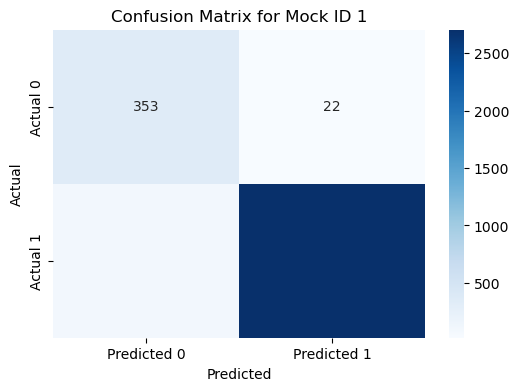

Results for Mock ID 1:
Sensitivity: 0.97
Specificity: 0.94
Accuracy: 96.26%
F1 Score: 0.98
Precision: 0.99
----------------------


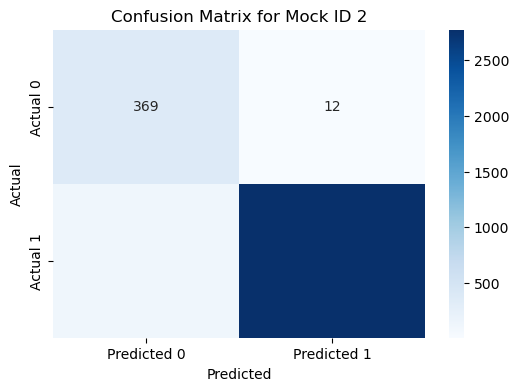

Results for Mock ID 2:
Sensitivity: 0.96
Specificity: 0.97
Accuracy: 95.96%
F1 Score: 0.98
Precision: 1.00
----------------------


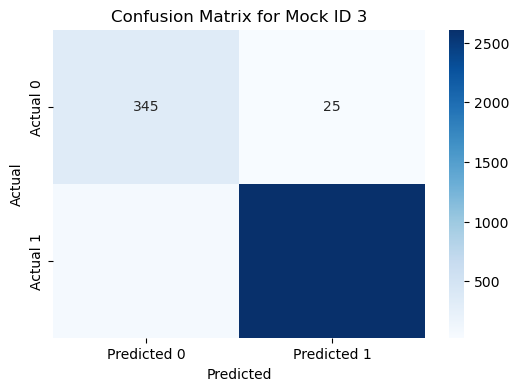

Results for Mock ID 3:
Sensitivity: 0.98
Specificity: 0.93
Accuracy: 97.01%
F1 Score: 0.98
Precision: 0.99
----------------------


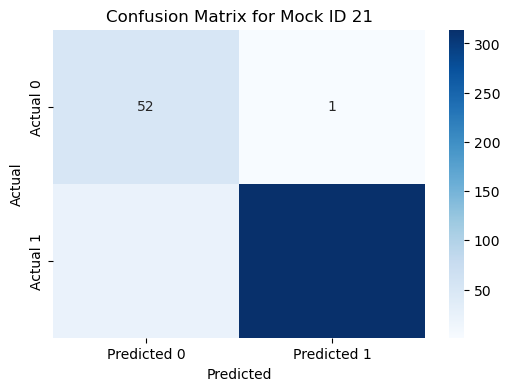

Results for Mock ID 21:
Sensitivity: 0.93
Specificity: 0.98
Accuracy: 93.85%
F1 Score: 0.96
Precision: 1.00
----------------------


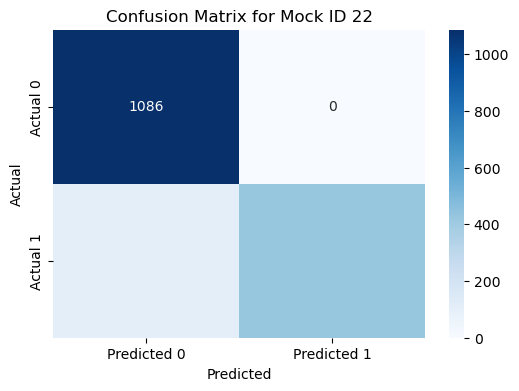

Results for Mock ID 22:
Sensitivity: 0.80
Specificity: 1.00
Accuracy: 93.40%
F1 Score: 0.89
Precision: 1.00
----------------------


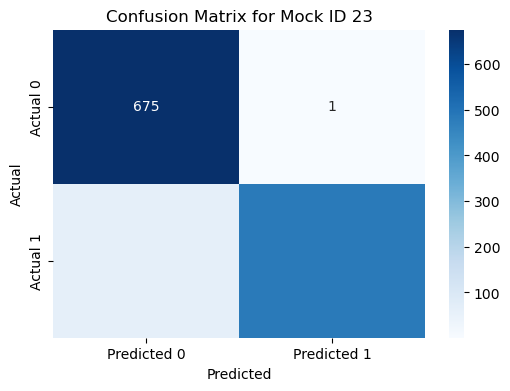

Results for Mock ID 23:
Sensitivity: 0.88
Specificity: 1.00
Accuracy: 94.76%
F1 Score: 0.94
Precision: 1.00
----------------------


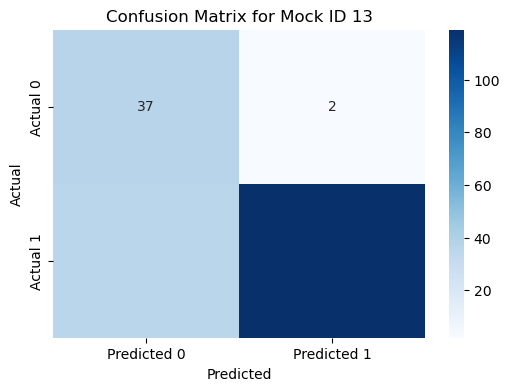

Results for Mock ID 13:
Sensitivity: 0.77
Specificity: 0.95
Accuracy: 80.41%
F1 Score: 0.86
Precision: 0.98
----------------------


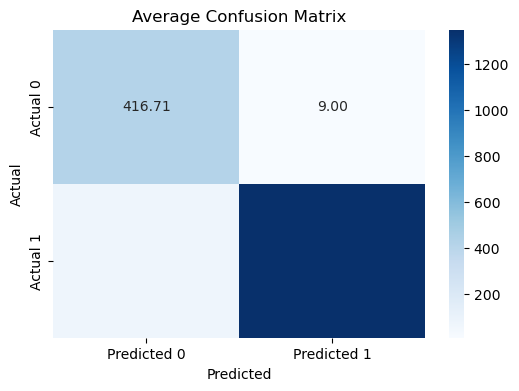

Average Results Across All Mocks:
Average Sensitivity: 0.90
Average Specificity: 0.97
Average Accuracy: 93.09%
Average F1 Score: 0.94
Average Precision: 0.99


In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample combined_df and val_df_combined data
# combined_df = pd.read_csv('combined_df.csv')  # Replace with your data loading method
# val_df_combined = pd.read_csv('val_df_combined.csv')  # Replace with your data loading method

best_train_mocks = [15, 12, 19, 20]
best_test_mocks = (5, 18, 14)

train_df = combined_df[combined_df['mock_id'].isin(best_train_mocks)]
test_df = combined_df[combined_df['mock_id'].isin(best_test_mocks)]

drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch',
                '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence', 'ischimera','uchime3','YN_']

XX_train = train_df.drop(columns=drop_columns)
yy_train = train_df['numParents']
XX_test = test_df.drop(columns=drop_columns)
yy_test = test_df['numParents']

scaler = StandardScaler()
XX_train_scaled = scaler.fit_transform(XX_train)
XX_test_scaled = scaler.transform(XX_test)

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=15,
    n_estimators=600,
    learning_rate=0.001,
    subsample=0.8,
    colsample_bytree=0.2,
    random_state=42
)
xgb_clf.fit(XX_train_scaled, yy_train)

results_per_mock = []
conf_matrices = []

# Iterate through each mock_id in the validation set
mock_ids = val_df_combined['mock_id'].unique()
for mock_id in mock_ids:
    val_df = val_df_combined[val_df_combined['mock_id'] == mock_id]
    XX_val = val_df.drop(columns=drop_columns)
    yy_val = val_df['numParents']
    XX_val_scaled = scaler.transform(XX_val)
    probabilities = xgb_clf.predict_proba(XX_val_scaled)[:, 1]

    optimal_threshold = 0.48
    predictions = (probabilities >= optimal_threshold).astype(int)
    conf_matrix_val = confusion_matrix(yy_val, predictions)

    # Calculate sensitivity, specificity, accuracy, F1-score, and precision
    sensitivity = conf_matrix_val[1, 1] / (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) if (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) > 0 else 0
    specificity = conf_matrix_val[0, 0] / (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) if (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) > 0 else 0
    accuracy = (conf_matrix_val[0, 0] + conf_matrix_val[1, 1]) / conf_matrix_val.sum()
    f1 = f1_score(yy_val, predictions)
    precision = precision_score(yy_val, predictions)

    # Store results for each mock
    results_per_mock.append({
        'Mock ID': mock_id,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision
    })

    conf_matrices.append(conf_matrix_val)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for Mock ID {mock_id}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print individual mock results
    print(f"Results for Mock ID {mock_id}:")
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("----------------------")

# Calculate averages of the metrics
average_sensitivity = sum([result['Sensitivity'] for result in results_per_mock]) / len(results_per_mock)
average_specificity = sum([result['Specificity'] for result in results_per_mock]) / len(results_per_mock)
average_accuracy = sum([result['Accuracy'] for result in results_per_mock]) / len(results_per_mock)
average_f1 = sum([result['F1 Score'] for result in results_per_mock]) / len(results_per_mock)
average_precision = sum([result['Precision'] for result in results_per_mock]) / len(results_per_mock)

# Calculate the average confusion matrix
average_conf_matrix = np.mean(conf_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(average_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print average results
print("Average Results Across All Mocks:")
print(f"Average Sensitivity: {average_sensitivity:.2f}")
print(f"Average Specificity: {average_specificity:.2f}")
print(f"Average Accuracy: {average_accuracy:.2%}")
print(f"Average F1 Score: {average_f1:.2f}")
print(f"Average Precision: {average_precision:.2f}")


   Mock ID  Sensitivity  Specificity  Accuracy  F1 Score  Precision
0        1     0.965394     0.941333  0.962555  0.978485   0.991935
1        2     0.958478     0.968504  0.959645  0.976728   0.995687
2        3     0.975327     0.932432  0.970115  0.982859   0.990509
3       21     0.931751     0.981132  0.938462  0.963190   0.996825
4       22     0.799625     1.000000  0.933951  0.888658   1.000000
5       23     0.884615     0.998521  0.947627  0.937864   0.997934
6       13     0.767742     0.948718  0.804124  0.862319   0.983471


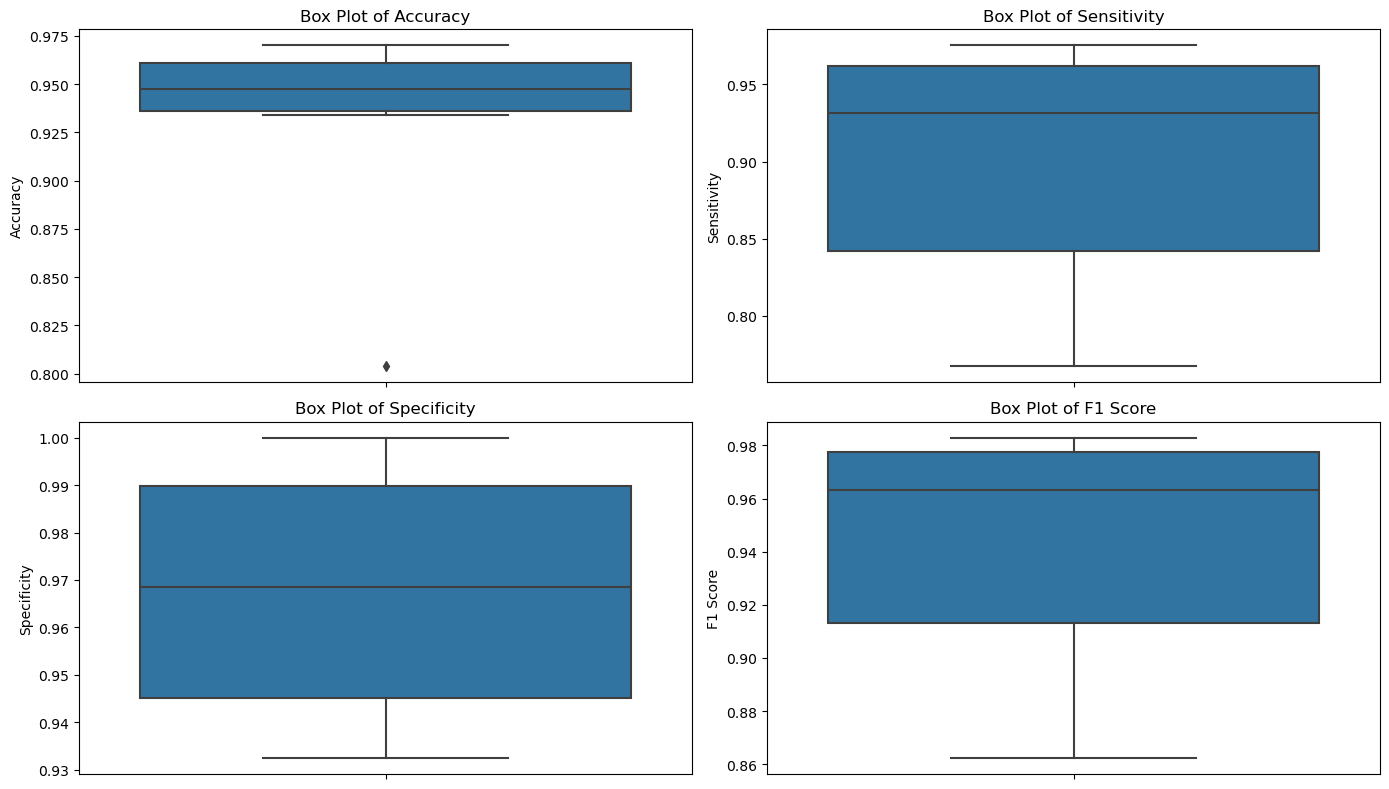

Average Results Across All Mocks:
Average Sensitivity: 0.90
Average Specificity: 0.97
Average Accuracy: 93.09%
Average F1 Score: 0.94
Average Precision: 0.99


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame(results_per_mock)

print(results_df)
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=results_df, y='Accuracy')
plt.title('Box Plot of Accuracy')

plt.subplot(2, 2, 2)
sns.boxplot(data=results_df, y='Sensitivity')
plt.title('Box Plot of Sensitivity')

plt.subplot(2, 2, 3)
sns.boxplot(data=results_df, y='Specificity')
plt.title('Box Plot of Specificity')

plt.subplot(2, 2, 4)
sns.boxplot(data=results_df, y='F1 Score')
plt.title('Box Plot of F1 Score')

plt.tight_layout()
plt.show()
print("Average Results Across All Mocks:")
print(f"Average Sensitivity: {average_sensitivity:.2f}")
print(f"Average Specificity: {average_specificity:.2f}")
print(f"Average Accuracy: {average_accuracy:.2%}")
print(f"Average F1 Score: {average_f1:.2f}")
print(f"Average Precision: {average_precision:.2f}")


Train Data ROC 

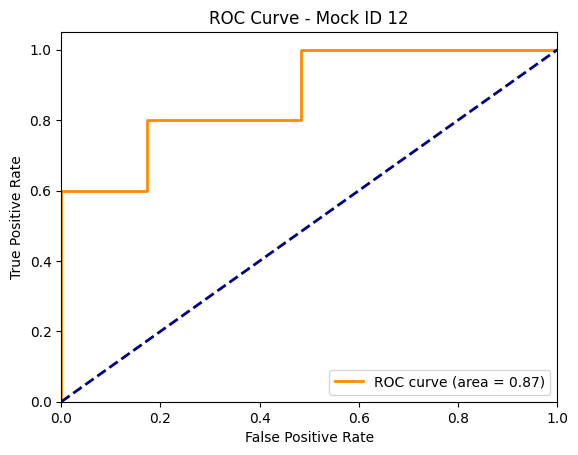


ROC AUC for Mock ID 12: 0.87
----------------------



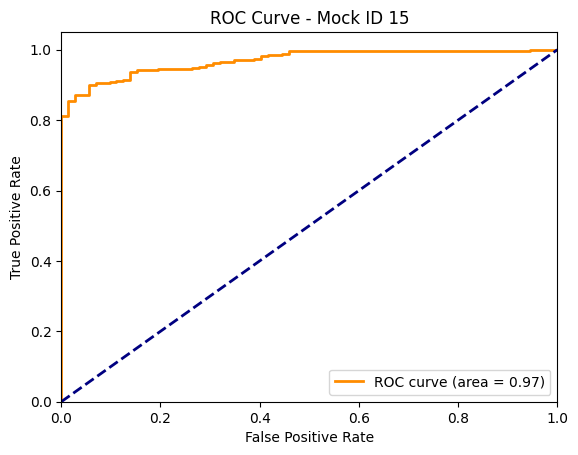


ROC AUC for Mock ID 15: 0.97
----------------------



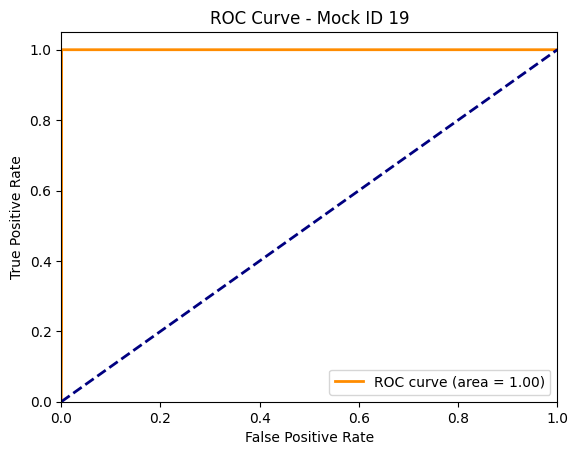


ROC AUC for Mock ID 19: 1.00
----------------------



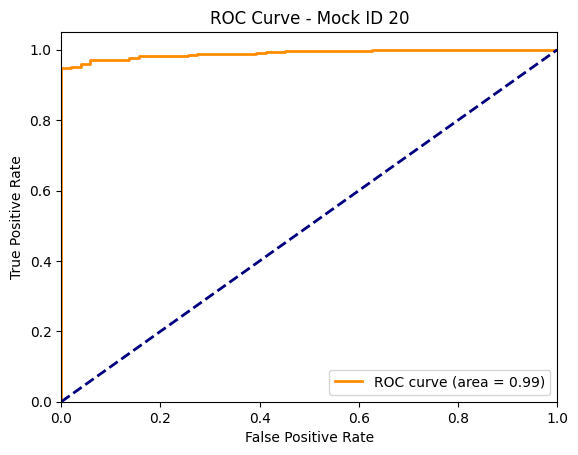


ROC AUC for Mock ID 20: 0.99
----------------------

    Threshold  Average Sensitivity  Average Specificity
0    0.400000             0.878186             0.922251
1    0.412245             0.877598             0.930625
2    0.424490             0.875147             0.930625
3    0.436735             0.873333             0.930625
4    0.448980             0.870270             0.942471
5    0.461224             0.869044             0.962692
6    0.473469             0.817819             0.966164
7    0.485714             0.814755             0.971066
8    0.497959             0.759314             0.971066
9    0.510204             0.756299             0.978010
10   0.522449             0.750882             0.991287
11   0.534694             0.746667             0.996189
12   0.546939             0.742500             0.996189
13   0.559184             0.736520             0.996189
14   0.571429             0.726348             0.996189
15   0.583673             0.716740             0.9

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

def calculate_roc_sensitivity_specificity(model, train_data, drop_columns, scaler):
    results_per_mock = []
    all_thresholds = np.linspace(0.4, 1, 50)
    sensitivities_dict = {threshold: [] for threshold in all_thresholds}
    specificities_dict = {threshold: [] for threshold in all_thresholds}
    
    mock_ids = train_data['mock_id'].unique()
    for mock_id in mock_ids:
        train_df = train_data[train_data['mock_id'] == mock_id]
        XX_train = train_df.drop(columns=drop_columns)
        yy_train = train_df['numParents']
        XX_train_scaled = scaler.transform(XX_train)
        probabilities = model.predict_proba(XX_train_scaled)[:, 1]

        fpr, tpr, _ = roc_curve(yy_train, probabilities)
        roc_auc = auc(fpr, tpr)
        
        mock_sensitivities = []
        mock_specificities = []
        
        for threshold in all_thresholds:
            predictions = (probabilities >= threshold).astype(int)
            conf_matrix = confusion_matrix(yy_train, predictions)

            sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
            specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0

            sensitivities_dict[threshold].append(sensitivity)
            specificities_dict[threshold].append(specificity)
            
            mock_sensitivities.append(sensitivity)
            mock_specificities.append(specificity)
        
        mock_results_df = pd.DataFrame({
            'Threshold': all_thresholds,
            'Sensitivity': mock_sensitivities,
            'Specificity': mock_specificities
        })
        
        mock_results_df.to_csv(f'mock{mock_id}_train_results.csv', index=False)

        results_per_mock.append({
            'Mock ID': mock_id,
            'ROC AUC': roc_auc
        })

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Mock ID {mock_id}')
        plt.legend(loc="lower right")
        plt.show()

        print(f"\nROC AUC for Mock ID {mock_id}: {roc_auc:.2f}")
        print("----------------------\n")

    avg_sensitivities = [np.mean(sensitivities_dict[threshold]) for threshold in all_thresholds]
    avg_specificities = [np.mean(specificities_dict[threshold]) for threshold in all_thresholds]

    averages_df = pd.DataFrame({
        'Threshold': all_thresholds,
        'Average Sensitivity': avg_sensitivities,
        'Average Specificity': avg_specificities
    })

    print(averages_df)

    # Save the averages dataframe to a CSV file
    averages_df.to_csv('average_roc_trainData.csv', index=False)

    return results_per_mock, averages_df

# Assuming xgb_clf, train_df_combined, drop_columns, and scaler are already defined
roc_results, averages_df = calculate_roc_sensitivity_specificity(xgb_clf, train_df_combined, drop_columns, scaler)


TEST DATA ROC

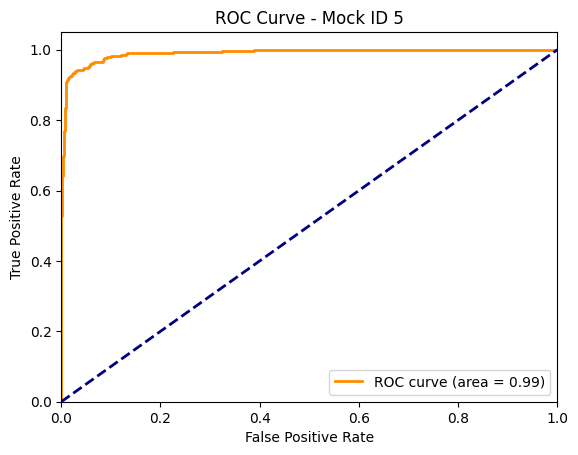


ROC AUC for Mock ID 5: 0.99
----------------------



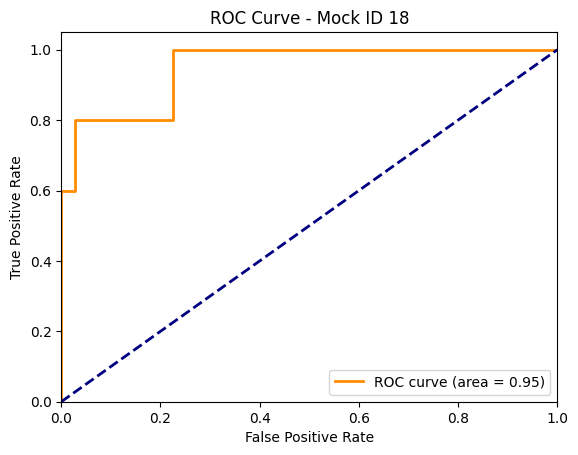


ROC AUC for Mock ID 18: 0.95
----------------------



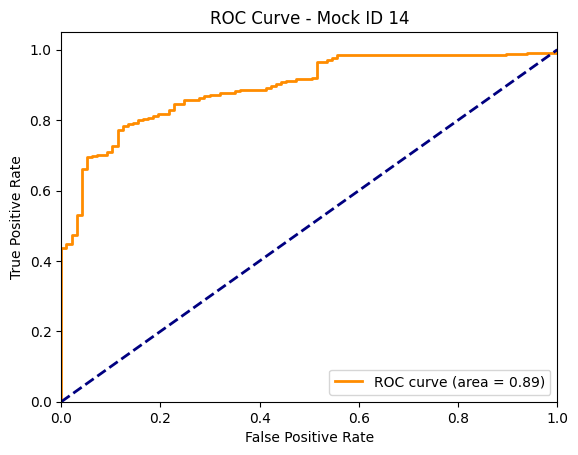


ROC AUC for Mock ID 14: 0.89
----------------------

    Threshold  Average Sensitivity  Average Specificity
0    0.400000             0.764398             0.924392
1    0.412245             0.745806             0.931891
2    0.424490             0.735525             0.935640
3    0.436735             0.726370             0.942826
4    0.448980             0.721715             0.946263
5    0.461224             0.705936             0.956885
6    0.473469             0.689812             0.960634
7    0.485714             0.677753             0.960947
8    0.497959             0.667100             0.961260
9    0.510204             0.655041             0.964697
10   0.522449             0.647138             0.968446
11   0.534694             0.638609             0.968759
12   0.546939             0.633827             0.975632
13   0.559184             0.623828             0.979068
14   0.571429             0.614237             0.982505
15   0.583673             0.594275             0.9

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

def calculate_roc_sensitivity_specificity(model, test_data, drop_columns, scaler):
    results_per_mock = []
    all_thresholds = np.linspace(0.4, 1, 50)
    sensitivities_dict = {threshold: [] for threshold in all_thresholds}
    specificities_dict = {threshold: [] for threshold in all_thresholds}
    
    mock_ids = test_data['mock_id'].unique()
    for mock_id in mock_ids:
        test_df = test_data[test_data['mock_id'] == mock_id]
        XX_test = test_df.drop(columns=drop_columns)
        yy_test = test_df['numParents']
        XX_test_scaled = scaler.transform(XX_test)
        probabilities = model.predict_proba(XX_test_scaled)[:, 1]

        fpr, tpr, _ = roc_curve(yy_test, probabilities)
        roc_auc = auc(fpr, tpr)
        
        mock_sensitivities = []
        mock_specificities = []
        
        for threshold in all_thresholds:
            predictions = (probabilities >= threshold).astype(int)
            conf_matrix = confusion_matrix(yy_test, predictions)

            sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
            specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0

            sensitivities_dict[threshold].append(sensitivity)
            specificities_dict[threshold].append(specificity)
            
            mock_sensitivities.append(sensitivity)
            mock_specificities.append(specificity)
        
        mock_results_df = pd.DataFrame({
            'Threshold': all_thresholds,
            'Sensitivity': mock_sensitivities,
            'Specificity': mock_specificities
        })
        
        mock_results_df.to_csv(f'mock{mock_id}_test_results.csv', index=False)

        results_per_mock.append({
            'Mock ID': mock_id,
            'ROC AUC': roc_auc
        })

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Mock ID {mock_id}')
        plt.legend(loc="lower right")
        plt.show()

        print(f"\nROC AUC for Mock ID {mock_id}: {roc_auc:.2f}")
        print("----------------------\n")

    avg_sensitivities = [np.mean(sensitivities_dict[threshold]) for threshold in all_thresholds]
    avg_specificities = [np.mean(specificities_dict[threshold]) for threshold in all_thresholds]

    averages_df = pd.DataFrame({
        'Threshold': all_thresholds,
        'Average Sensitivity': avg_sensitivities,
        'Average Specificity': avg_specificities
    })

    print(averages_df)

    # Save the averages dataframe to a CSV file
    averages_df.to_csv('average_roc_testData.csv', index=False)

    return results_per_mock, averages_df

# Assuming xgb_clf, train_df_combined, drop_columns, and scaler are already defined
roc_results, averages_df = calculate_roc_sensitivity_specificity(xgb_clf, test_df_combined, drop_columns, scaler)


ROC VALIDATION DATA

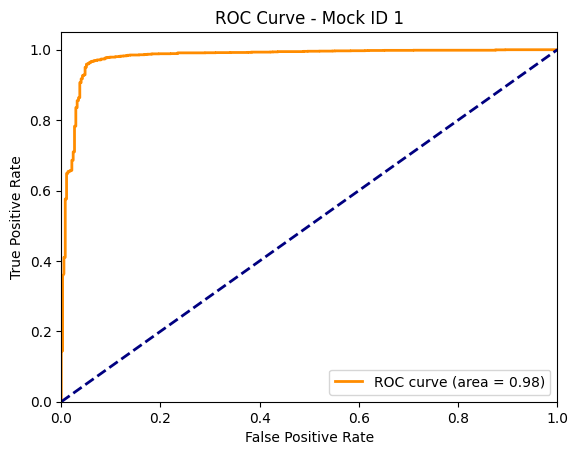


ROC AUC for Mock ID 1: 0.98
----------------------



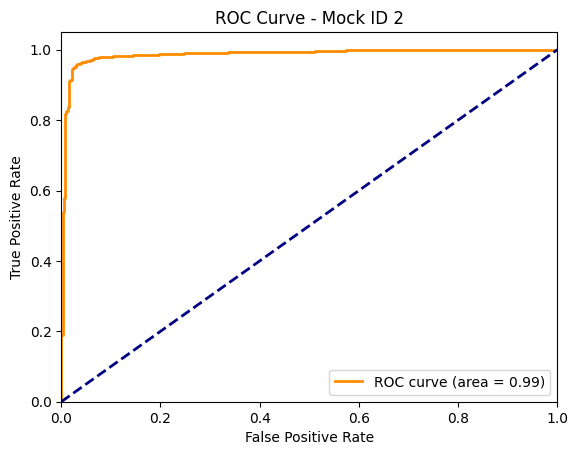


ROC AUC for Mock ID 2: 0.99
----------------------



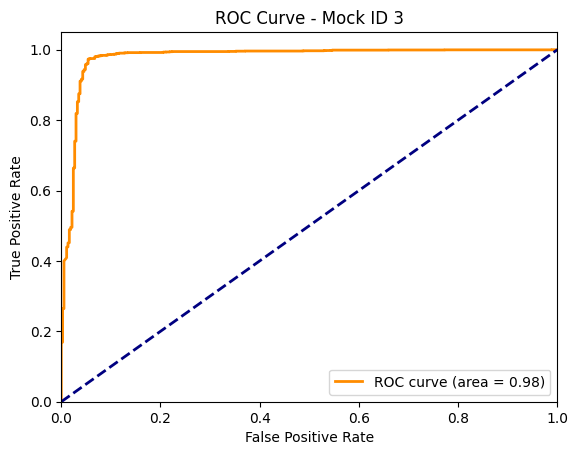


ROC AUC for Mock ID 3: 0.98
----------------------



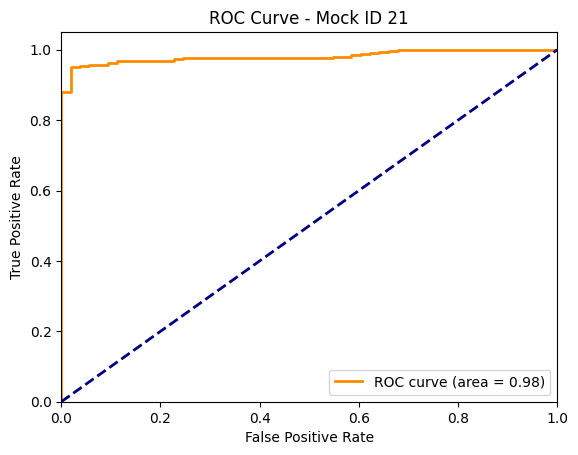


ROC AUC for Mock ID 21: 0.98
----------------------



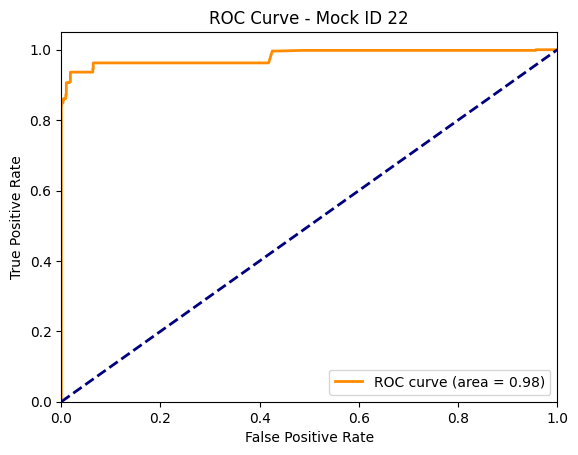


ROC AUC for Mock ID 22: 0.98
----------------------



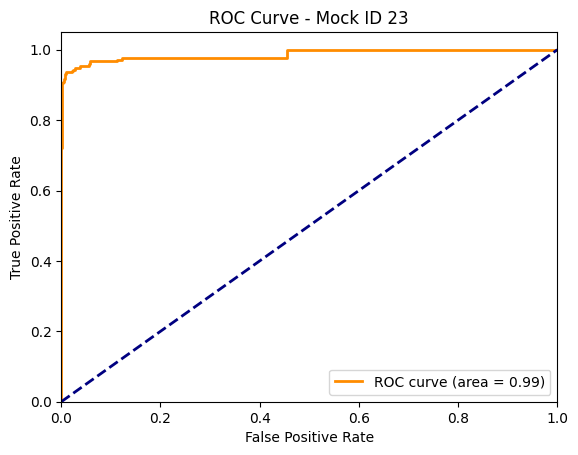


ROC AUC for Mock ID 23: 0.99
----------------------



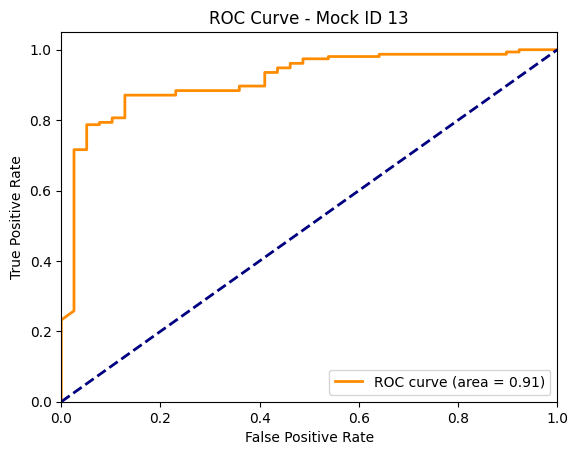


ROC AUC for Mock ID 13: 0.91
----------------------

    Threshold  Average Sensitivity  Average Specificity
0    0.400000             0.935566             0.897832
1    0.412245             0.931115             0.916307
2    0.424490             0.923199             0.925022
3    0.436735             0.918218             0.939059
4    0.448980             0.914104             0.946540
5    0.461224             0.909244             0.959776
6    0.473469             0.903233             0.966103
7    0.485714             0.892908             0.969160
8    0.497959             0.873266             0.971058
9    0.510204             0.865336             0.972575
10   0.522449             0.852645             0.973347
11   0.534694             0.833783             0.975251
12   0.546939             0.800745             0.976779
13   0.559184             0.779034             0.980834
14   0.571429             0.747901             0.983112
15   0.583673             0.648662             0.9

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

def calculate_roc_sensitivity_specificity(model, val_data, drop_columns, scaler):
    results_per_mock = []
    all_thresholds = np.linspace(0.4, 1, 50)
    sensitivities_dict = {threshold: [] for threshold in all_thresholds}
    specificities_dict = {threshold: [] for threshold in all_thresholds}
    
    mock_ids = val_data['mock_id'].unique()
    for mock_id in mock_ids:
        val_df = val_data[val_data['mock_id'] == mock_id]
        XX_val = val_df.drop(columns=drop_columns)
        yy_val = val_df['numParents']
        XX_val_scaled = scaler.transform(XX_val)
        probabilities = model.predict_proba(XX_val_scaled)[:, 1]

        fpr, tpr, _ = roc_curve(yy_val, probabilities)
        roc_auc = auc(fpr, tpr)
        
        mock_sensitivities = []
        mock_specificities = []
        
        for threshold in all_thresholds:
            predictions = (probabilities >= threshold).astype(int)
            conf_matrix = confusion_matrix(yy_val, predictions)

            sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
            specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0

            sensitivities_dict[threshold].append(sensitivity)
            specificities_dict[threshold].append(specificity)
            
            mock_sensitivities.append(sensitivity)
            mock_specificities.append(specificity)
        
        mock_results_df = pd.DataFrame({
            'Threshold': all_thresholds,
            'Sensitivity': mock_sensitivities,
            'Specificity': mock_specificities
        })
        
        mock_results_df.to_csv(f'mock{mock_id}_val_results.csv', index=False)

        results_per_mock.append({
            'Mock ID': mock_id,
            'ROC AUC': roc_auc
        })

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Mock ID {mock_id}')
        plt.legend(loc="lower right")
        plt.show()

        print(f"\nROC AUC for Mock ID {mock_id}: {roc_auc:.2f}")
        print("----------------------\n")

    avg_sensitivities = [np.mean(sensitivities_dict[threshold]) for threshold in all_thresholds]
    avg_specificities = [np.mean(specificities_dict[threshold]) for threshold in all_thresholds]

    averages_df = pd.DataFrame({
        'Threshold': all_thresholds,
        'Average Sensitivity': avg_sensitivities,
        'Average Specificity': avg_specificities
    })

    print(averages_df)

    # Save the averages dataframe to a CSV file
    averages_df.to_csv('average_roc_valData.csv', index=False)

    return results_per_mock, averages_df

# Assuming xgb_clf, train_df_combined, drop_columns, and scaler are already defined
roc_results, averages_df = calculate_roc_sensitivity_specificity(xgb_clf, val_df_combined, drop_columns, scaler)


In [65]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

tools = ['vs18', 'YN', 'Flag', 'TypeOfSequence', 'ischimera', 'uchime3','YN_']

metrics = {tool: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Specificity': [], 'Sensitivity': []} for tool in tools}

mocks = val_df_combined['mock_id'].unique()

def compute_metrics(df, tool):
    tp, fn, fp, tn = confusion_matrix(df['numParents'], df[tool], labels=[1, 0]).ravel()
    return {
        'Accuracy': accuracy_score(df['numParents'], df[tool]),
        'Precision': precision_score(df['numParents'], df[tool]),
        'Recall': recall_score(df['numParents'], df[tool]),
        'F1 Score': f1_score(df['numParents'], df[tool]),
        'Specificity': tn / (tn + fp) if (tn + fp) != 0 else float('nan'),  # Handle division by zero
        'Sensitivity': recall_score(df['numParents'], df[tool])  # Sensitivity is the same as recall
    }

for mock in mocks:
    mock_df = val_df_combined[val_df_combined['mock_id'] == mock]
    for tool in tools:
        tool_metrics = compute_metrics(mock_df, tool)
        for metric, value in tool_metrics.items():
            metrics[tool][metric].append(value)

def average_metrics(tool_metrics):
    return {metric: sum(values) / len(values) for metric, values in tool_metrics.items()}

average_metrics_dict = {tool: average_metrics(tool_metrics) for tool, tool_metrics in metrics.items()}

average_metrics_df = pd.DataFrame(average_metrics_dict).T

new_metrics = {
    'Accuracy': average_accuracy,
    'Precision': average_precision,
    'Recall': average_sensitivity,
    'F1 Score': average_f1,
    'Specificity': average_specificity,
    'Sensitivity': average_sensitivity
}

# Create a DataFrame for the new metrics
new_metrics_df = pd.DataFrame(new_metrics, index=['XGBOOST'])

metrics_df_av = pd.concat([average_metrics_df, new_metrics_df])

metrics_df_av

,Accuracy,Precision,Recall,F1 Score,Specificity,Sensitivity
vs18,0.891018,0.983218,0.851966,0.909357,0.937564,0.851966
YN,0.850621,0.991845,0.787000,0.868598,0.970591,0.787000
Flag,0.805469,0.993515,0.702280,0.807188,0.966606,0.702280
TypeOfSequence,0.719900,0.909329,0.539241,0.638715,0.957002,0.539241
ischimera,0.777298,0.781907,0.958387,0.839267,0.375856,0.958387
uchime3,0.603169,0.771470,0.779161,0.715586,0.453299,0.779161
YN_,0.811085,0.817440,0.749479,0.778344,0.760767,0.749479
XGBOOST,0.930925,0.993766,0.897562,0.941443,0.967234,0.897562


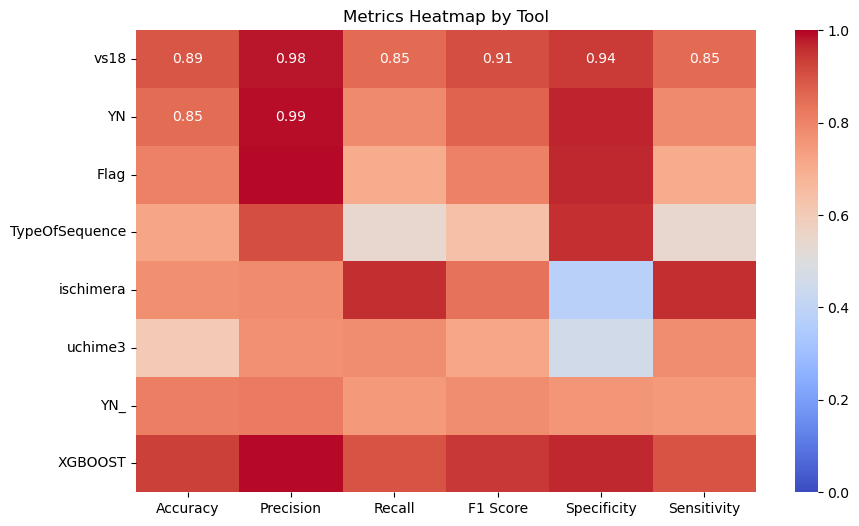

In [66]:



plt.figure(figsize=(10, 6))
metrics_heatmap_df = metrics_df_av
sns.heatmap(metrics_heatmap_df, annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1)
plt.title('Metrics Heatmap by Tool')
plt.show()

In [14]:
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from xgboost import XGBClassifier


mock_ids = [15, 12, 19, 20, 5, 18, 14]

def evaluate_combination(train_mocks, test_mocks, combined_df, val_df_combined):
    train_df = combined_df[combined_df['mock_id'].isin(train_mocks)]
    test_df = combined_df[combined_df['mock_id'].isin(test_mocks)]

    drop_columns = ['numParents', 'mock_id', 'DiffsToBestMatch', 'BestMatchIndex', 'DistanceToBestMatch',
                    '(cIndex - singleDist)', 'loonIndex', 'ChimeraBreakPoint', 'TypeOfSequence', 'ischimera' ]

    XX_train = train_df.drop(columns=drop_columns)
    yy_train = train_df['numParents']
    XX_test = test_df.drop(columns=drop_columns)
    yy_test = test_df['numParents']

    scaler = StandardScaler()
    XX_train_scaled = scaler.fit_transform(XX_train)
    XX_test_scaled = scaler.transform(XX_test)

    xgb_clf = XGBClassifier(
        objective='binary:logistic', 
        max_depth=15, 
        n_estimators=600, 
        learning_rate=0.001, 
        subsample=0.8,
        colsample_bytree=0.2, 
        random_state=42
    )
    xgb_clf.fit(XX_train_scaled, yy_train)

    results_per_mock = []

    validation_mock_ids = val_df_combined['mock_id'].unique()
    for mock_id in validation_mock_ids:
        val_df = val_df_combined[val_df_combined['mock_id'] == mock_id]
        XX_val = val_df.drop(columns=drop_columns)
        yy_val = val_df['numParents']
        XX_val_scaled = scaler.transform(XX_val)
        probabilities = xgb_clf.predict_proba(XX_val_scaled)[:, 1]

        optimal_threshold = 0.48
        predictions = (probabilities >= optimal_threshold).astype(int)
        conf_matrix_val = confusion_matrix(yy_val, predictions)
        
        # Calculate sensitivity, specificity, accuracy, and F1-score
        sensitivity = conf_matrix_val[1, 1] / (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) if (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) > 0 else 0
        specificity = conf_matrix_val[0, 0] / (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) if (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) > 0 else 0
        accuracy = (conf_matrix_val[0, 0] + conf_matrix_val[1, 1]) / conf_matrix_val.sum()
        f1 = f1_score(yy_val, predictions)
        precision = precision_score(yy_val, predictions)
        
        results_per_mock.append({
            'Mock ID': mock_id,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision
        })

    average_sensitivity = sum([result['Sensitivity'] for result in results_per_mock]) / len(results_per_mock)
    average_specificity = sum([result['Specificity'] for result in results_per_mock]) / len(results_per_mock)
    average_accuracy = sum([result['Accuracy'] for result in results_per_mock]) / len(results_per_mock)
    average_f1 = sum([result['F1 Score'] for result in results_per_mock]) / len(results_per_mock)
    average_precision = sum([result['Precision'] for result in results_per_mock]) / len(results_per_mock)

    return {
        'Train Mocks': train_mocks,
        'Test Mocks': test_mocks,
        'Average Sensitivity': average_sensitivity,
        'Average Specificity': average_specificity,
        'Average Accuracy': average_accuracy,
        'Average F1 Score': average_f1,
        'Average Precision': average_precision
    }

train_test_combinations = []

for train_mocks in itertools.combinations(mock_ids, len(mock_ids) - 3):
    test_mocks = list(set(mock_ids) - set(train_mocks))
    train_test_combinations.append((train_mocks, test_mocks))

results = []
for train_mocks, test_mocks in train_test_combinations:
    result = evaluate_combination(train_mocks, test_mocks, combined_df, val_df_combined)
    results.append(result)

for result in results:
    print(f"Train Mocks: {result['Train Mocks']}")
    print(f"Test Mocks: {result['Test Mocks']}")
    print(f"Average Sensitivity: {result['Average Sensitivity']:.2f}")
    print(f"Average Specificity: {result['Average Specificity']:.2f}")
    print(f"Average Accuracy: {result['Average Accuracy']:.2%}")
    print(f"Average F1 Score: {result['Average F1 Score']:.2f}")
    print(f"Average Precision: {result['Average Precision']:.2f}")
    print("----------------------")

overall_average_sensitivity = sum([result['Average Sensitivity'] for result in results]) / len(results)
overall_average_specificity = sum([result['Average Specificity'] for result in results]) / len(results)
overall_average_accuracy = sum([result['Average Accuracy'] for result in results]) / len(results)
overall_average_f1 = sum([result['Average F1 Score'] for result in results]) / len(results)
overall_average_precision = sum([result['Average Precision'] for result in results]) / len(results)

print("Overall Average Results Across All Combinations:")
print(f"Overall Average Sensitivity: {overall_average_sensitivity:.2f}")
print(f"Overall Average Specificity: {overall_average_specificity:.2f}")
print(f"Overall Average Accuracy: {overall_average_accuracy:.2%}")
print(f"Overall Average F1 Score: {overall_average_f1:.2f}")
print(f"Overall Average Precision: {overall_average_precision:.2f}")


Train Mocks: (15, 12, 19, 20)
Test Mocks: [18, 5, 14]
Average Sensitivity: 0.90
Average Specificity: 0.97
Average Accuracy: 93.28%
Average F1 Score: 0.94
Average Precision: 0.99
----------------------
Train Mocks: (15, 12, 19, 5)
Test Mocks: [18, 20, 14]
Average Sensitivity: 0.93
Average Specificity: 0.92
Average Accuracy: 94.37%
Average F1 Score: 0.95
Average Precision: 0.98
----------------------
Train Mocks: (15, 12, 19, 18)
Test Mocks: [20, 5, 14]
Average Sensitivity: 0.56
Average Specificity: 0.99
Average Accuracy: 71.96%
Average F1 Score: 0.68
Average Precision: 1.00
----------------------
Train Mocks: (15, 12, 19, 14)
Test Mocks: [18, 20, 5]
Average Sensitivity: 0.85
Average Specificity: 0.98
Average Accuracy: 90.07%
Average F1 Score: 0.91
Average Precision: 1.00
----------------------
Train Mocks: (15, 12, 20, 5)
Test Mocks: [18, 19, 14]
Average Sensitivity: 1.00
Average Specificity: 0.42
Average Accuracy: 83.89%
Average F1 Score: 0.88
Average Precision: 0.80
------------------

In [73]:
drop_columns = ['numParents', 'mock_id','YN_']

tools_columns = {
    'vsearch': ['vs1', 'vs8', 'vs11', 'vs14', 'vs17', 'vs18'],
    'uchime': ['Score', 'IdQM', 'LY', 'RY', 'YN'],
    'chimeraslayer': ['BootStrapA', 'DivQLBQRA', 'BootStrapB', 'Flag'],
    'perseus': ['DiffsToBestMatch','DiffstToChimera' ,'IndexofLeftParent','IndexOfRightParent','cIndex','BestMatchIndex', 'DistanceToBestMatch', '(cIndex - singleDist)', 'loonIndex','MismatchesToChimera','MismatchToTrimera', 'ChimeraBreakPoint','LogisticProbability','TypeOfSequence'],
    'uchime3': ['uchime3'],
    'dada2': ['ischimera']
}

In [74]:
def validate_xgboost(train_df, val_df, drop_cols):
    X_train = train_df.drop(columns=drop_columns + drop_cols)
    y_train = train_df['numParents']
    X_val = val_df.drop(columns=drop_columns + drop_cols)
    y_val = val_df['numParents']

    common_cols = X_train.columns.intersection(X_val.columns)
    X_train = X_train[common_cols]
    X_val = X_val[common_cols]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    xgb_clf = xgb.XGBClassifier(
        objective='binary:logistic',
        max_depth=15,
        n_estimators=600,
        learning_rate=0.001,
        subsample=0.8,
        colsample_bytree=0.2,
        random_state=42
    )
    xgb_clf.fit(X_train_scaled, y_train)

    results_per_mock = []

    mock_ids = val_df['mock_id'].unique()
    for mock_id in mock_ids:
        val_df_mock = X_val[val_df['mock_id'] == mock_id]
        y_val_mock = y_val[val_df['mock_id'] == mock_id]
        X_val_mock_scaled = scaler.transform(val_df_mock)

        probabilities = xgb_clf.predict_proba(X_val_mock_scaled)[:, 1]
        optimal_threshold = 0.48
        predictions = (probabilities >= optimal_threshold).astype(int)
        conf_matrix_val = confusion_matrix(y_val_mock, predictions)

        sensitivity = conf_matrix_val[1, 1] / (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) if (conf_matrix_val[1, 0] + conf_matrix_val[1, 1]) > 0 else 0
        specificity = conf_matrix_val[0, 0] / (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) if (conf_matrix_val[0, 0] + conf_matrix_val[0, 1]) > 0 else 0
        accuracy = (conf_matrix_val[0, 0] + conf_matrix_val[1, 1]) / conf_matrix_val.sum()
        f1 = f1_score(y_val_mock, predictions)
        precision = precision_score(y_val_mock, predictions)

        results_per_mock.append({
            'Mock ID': mock_id,
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision
        })

    average_sensitivity = sum([result['Sensitivity'] for result in results_per_mock]) / len(results_per_mock)
    average_specificity = sum([result['Specificity'] for result in results_per_mock]) / len(results_per_mock)
    average_accuracy = sum([result['Accuracy'] for result in results_per_mock]) / len(results_per_mock)
    average_f1 = sum([result['F1 Score'] for result in results_per_mock]) / len(results_per_mock)
    average_precision = sum([result['Precision'] for result in results_per_mock]) / len(results_per_mock)

    return {
        'Average Sensitivity': average_sensitivity,
        'Average Specificity': average_specificity,
        'Average Accuracy': average_accuracy,
        'Average F1 Score': average_f1,
        'Average Precision': average_precision
    }


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

results = {
    'Tools Dropped': [],
    'Average Sensitivity': [],
    'Average Specificity': [],
    'Average Accuracy': [],
    'Average F1 Score': [],
    'Average Precision': []
}

all_combinations = []
for i in range(1, 4):
    all_combinations.extend(combinations(tools_columns.keys(), i))

for combo in all_combinations:
    cols_to_drop = sum([tools_columns[tool] for tool in combo], [])
    results_without_tools = validate_xgboost(train_df, val_df_combined, cols_to_drop)

    results['Tools Dropped'].append(', '.join(combo))
    results['Average Sensitivity'].append(results_without_tools['Average Sensitivity'])
    results['Average Specificity'].append(results_without_tools['Average Specificity'])
    results['Average Accuracy'].append(results_without_tools['Average Accuracy'])
    results['Average F1 Score'].append(results_without_tools['Average F1 Score'])
    results['Average Precision'].append(results_without_tools['Average Precision'])

results_df = pd.DataFrame(results)


In [77]:
results_df

,Tools Dropped,Average Sensitivity,Average Specificity,Average Accuracy,Average F1 Score,Average Precision
0,vsearch,0.771288,0.967251,0.877741,0.846736,0.993569
1,uchime,0.813155,0.968196,0.900563,0.880769,0.994279
2,chimeraslayer,0.843943,0.968763,0.913081,0.904738,0.994033
3,perseus,0.902438,0.936634,0.928929,0.941612,0.988055
4,uchime3,0.859537,0.968377,0.918029,0.917048,0.993976
5,dada2,0.855115,0.968763,0.915621,0.914154,0.994016
6,"vsearch, uchime",0.737229,0.971300,0.860756,0.815718,0.994593
7,"vsearch, chimeraslayer",0.768015,0.967838,0.876351,0.843814,0.994108
8,"vsearch, perseus",0.886814,0.922187,0.916611,0.930988,0.985621
9,"vsearch, uchime3",0.776062,0.966103,0.884225,0.846934,0.993482


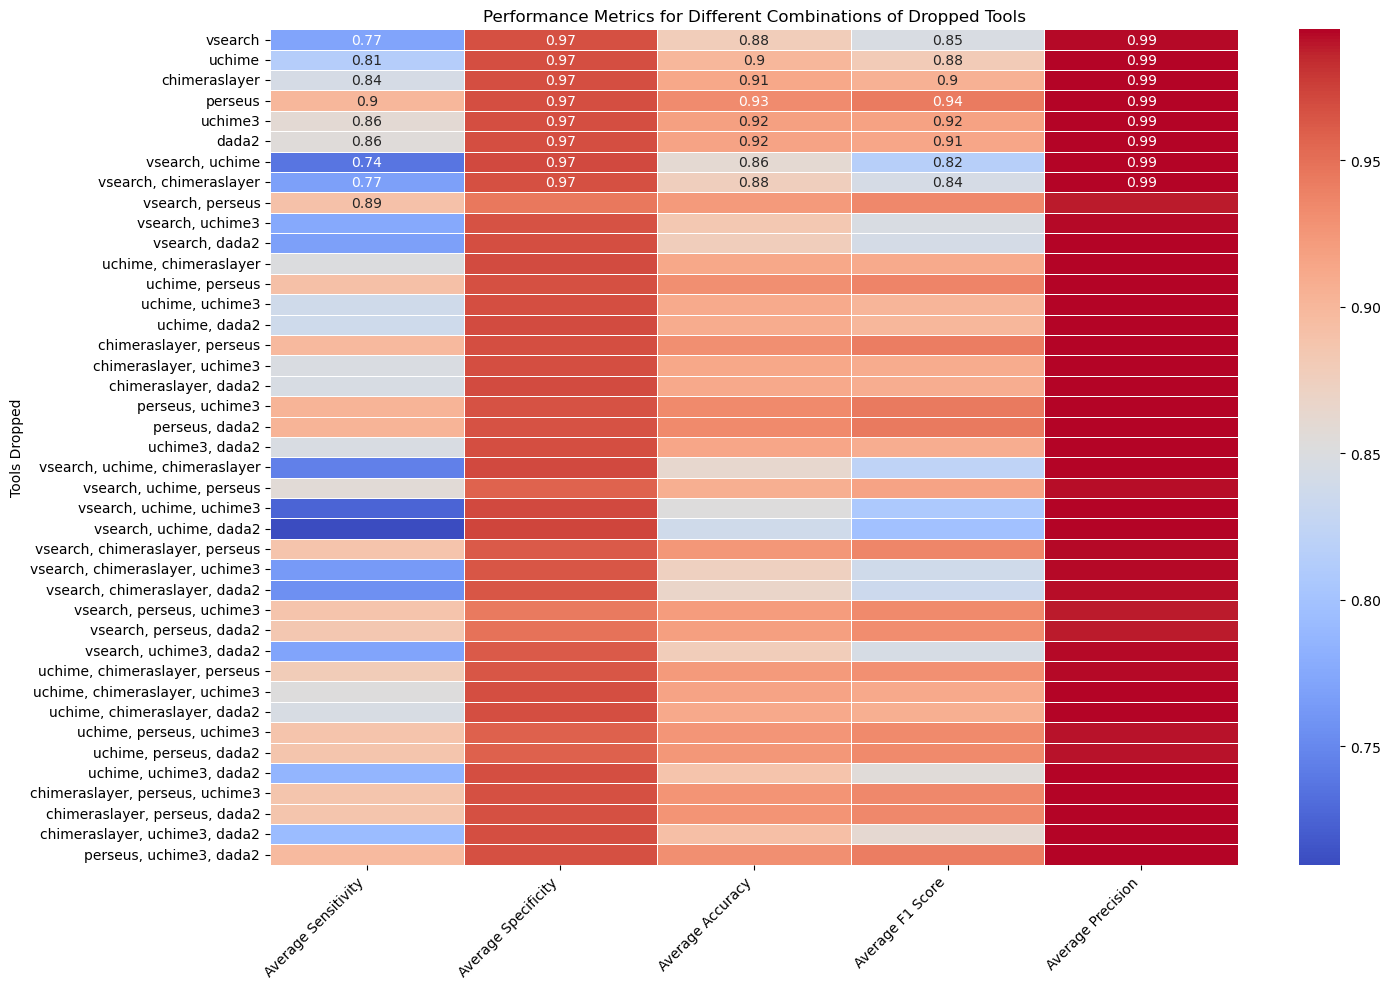

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = results_df.set_index('Tools Dropped')

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Performance Metrics for Different Combinations of Dropped Tools')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
